# Step 0: Load necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#  Step 1: Load the Dataset

We will use the **Adult Income dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult).  
This dataset is used to predict whether a person earns more than \$50K a year based on their demographic information.

The dataset includes:
- A **training set** (`adult.data`)
- A **test set** (`adult.test`)

Then do the following:
1. Use `.shape` to check how many rows and columns the dataset has.
2. Use `.head()` to display the first few rows of the dataset.

In [ ]:
# URL of the training data
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the training dataset
df_train = pd.read_csv(
    train_url,
    header=None,
    names=columns,
    na_values='?',
    skipinitialspace=True
)

print("Training set shape:", df_train.shape)
df_train.head()

Training set shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 2: Load and Clean the Test Dataset

The test dataset is very similar to the training dataset but has:
- A header row that we should skip
- `income` labels that include a period at the end, like `>50K.`

We will:
- Load the data
- Use the same column names
- Clean the `income` column by removing periods and extra spaces


In [ ]:
# URL of the test data
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Load the test dataset
df_test = pd.read_csv(
    test_url,
    header=None,
    names=columns,
    skiprows=1,            # Skip header line with text
    na_values='?',
    skipinitialspace=True
)

print("Test set shape:", df_test.shape)
df_test.head()

Test set shape: (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.



You might see that `.head()` shows **2 unique values** in both the training and test sets for the `income` column.  

But are those labels *exactly the same* in both datasets?

Let’s check more closely:

```python
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())
```

Take a careful look at the test labels — is there an extra character at the end?

---

###  Why This Matters

This tiny difference (a period `"."` at the end) might not look like a big deal, but it actually means the test labels are **different strings**.  
If we don’t fix this, your model could get confused — it might think `'>50K'` and `'>50K.'` are two different classes!

Even though your code might still run, your **accuracy will be wrong** if the labels don’t match.

---

###  Fix it!

Can you figure out how to **clean the labels** so the train and test values match?



In [ ]:
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K.' '>50K.']


In [ ]:
# Strip the period from the end of income labels in test set
df_test['income'] = df_test['income'].str.replace('.', '', regex=False).str.strip()

# Confirm fix
print("Train labels:", df_train['income'].unique())
print("Test labels:", df_test['income'].unique())

Train labels: ['<=50K' '>50K']
Test labels: ['<=50K' '>50K']


# Step 3: Explore the Dataset

Now that we've loaded the dataset, it's time to explore it!
<br/>
In Data Science, Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics—often using statistical graphics, plots, and other visualization tools.
<br/>
<br/>
EDA typically involves two main parts:
- Numerical statistics
- Visual analysis


## Numerical statistics

First, we’ll try to get some basic numerical insights from the dataset
<br/>
We’ll use:
- `describe` -- to get statistics like mean, standard deviation, min, max, and quartiles for the numerical features.
- `info` --  to get an overview of the dataset structure, including feature names, data types, non-null counts, and memory usage.
- `head(n)` – shows the first n rows of the dataset (default is 5). Great for a quick glance at the data.

- `shape` – returns a tuple showing the number of rows and columns.

- `value_counts()` – shows frequency counts for unique values in a column (great for categorical data).

- `isnull().sum()` – helps identify missing values per column.

- `duplicated().sum()` – shows total number of duplicated values.

In [ ]:
print("Train Description:\n", df_train.describe())
print("\nTest Description:\n", df_test.describe())

Train Description:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Test Description:
                 age    

In [ ]:
print("Train Info:")
df_train.info()
print("\nTest Info:")
df_test.info()

Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to

In [ ]:
print("Frequency of each income category (in Train):\n", df_train['income'].value_counts())
print("\nFrequency of each income category (in Test):\n", df_test['income'].value_counts())

Frequency of each income category (in Train):
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Frequency of each income category (in Test):
 income
<=50K    12435
>50K      3846
Name: count, dtype: int64


### Check for Missing Values

Missing values in train:
 workclass         1836
occupation        1843
native-country     583
dtype: int64

Missing values in test:
 workclass         963
occupation        966
native-country    274
dtype: int64


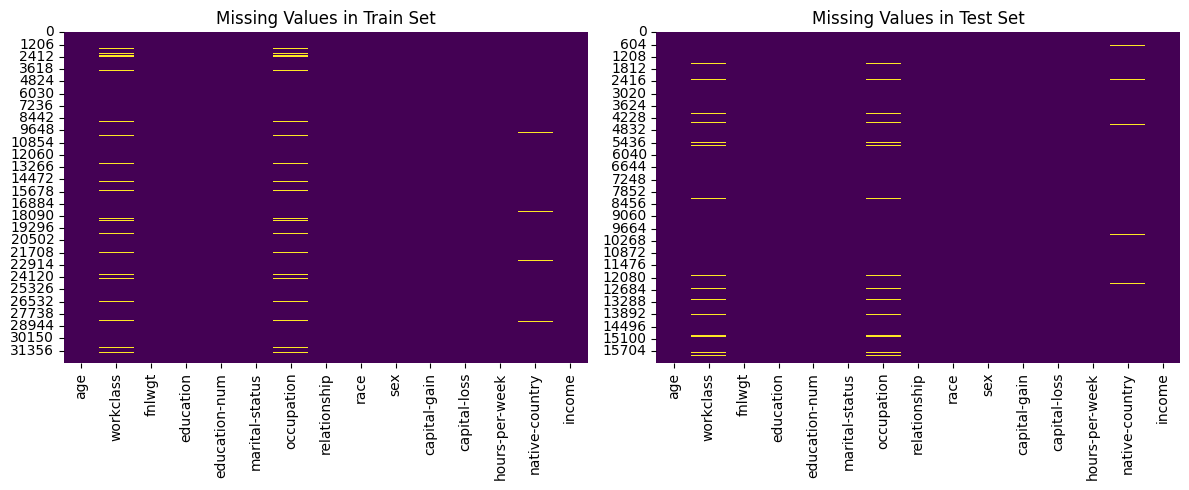

In [ ]:
# Missing value counts
print("Missing values in train:\n", df_train.isnull().sum()[df_train.isnull().sum() > 0])
print("\nMissing values in test:\n", df_test.isnull().sum()[df_test.isnull().sum() > 0])

# Visualizing missing values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Set')

plt.subplot(1, 2, 2)
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Set')

plt.tight_layout()
plt.show()

### Check for Duplicates

In [ ]:
# Count duplicates
train_dupes = df_train.duplicated().sum()
test_dupes = df_test.duplicated().sum()
print(f"Train duplicates: {train_dupes}")
print(f"Test duplicates: {test_dupes}")

# Drop duplicates
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

print("After dropping duplicates:")
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train duplicates: 24
Test duplicates: 5
After dropping duplicates:
Train shape: (32537, 15)
Test shape: (16276, 15)


## Visual analysis

The first step in visual analysis is to explore the distributions of features in the dataset. This helps us understand the shape of the data, detect outliers, and identify potential data quality issues or patterns.
<br/>
Common approaches include:
<br/>
- Bar plots – great for visualizing the distribution of categorical variables.

- Histograms – useful for showing the frequency distribution of numerical features.

- Box plots – helpful to spot outliers and understand the spread and skewness of data.

- Count plots – a variant of bar plots, often used with categorical data.

- KDE plots (Kernel Density Estimation) – smooth curves that estimate the probability distribution of a numerical variable.

- Pie charts – sometimes used for simple categorical distribution, though not always preferred.

### Visualizing the Target Variable


Since our target variable (`income`) is categorical, we can use a count plot to visualize its distribution. This helps us understand the class balance (e.g., whether the data is imbalanced):


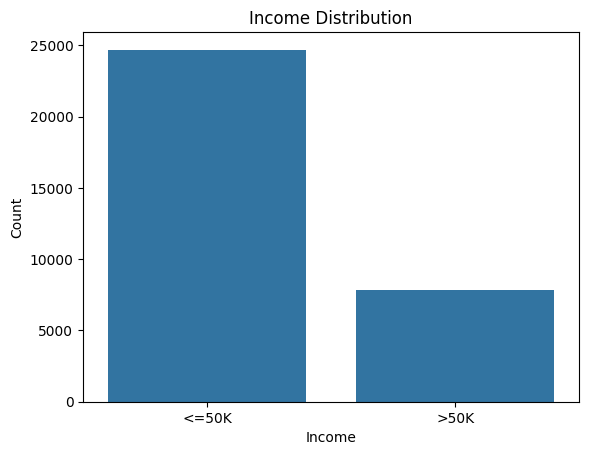

In [ ]:
sns.countplot(data=df_train, x='income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

### Exploring Education Level Distribution


Now, let's check the distribution of education levels in the dataset. This gives us insight into the average persona or demographic represented in the data

---
Answer the following questions:
- What is the most earned degree among participants?
- Is there a connection between education level and income?


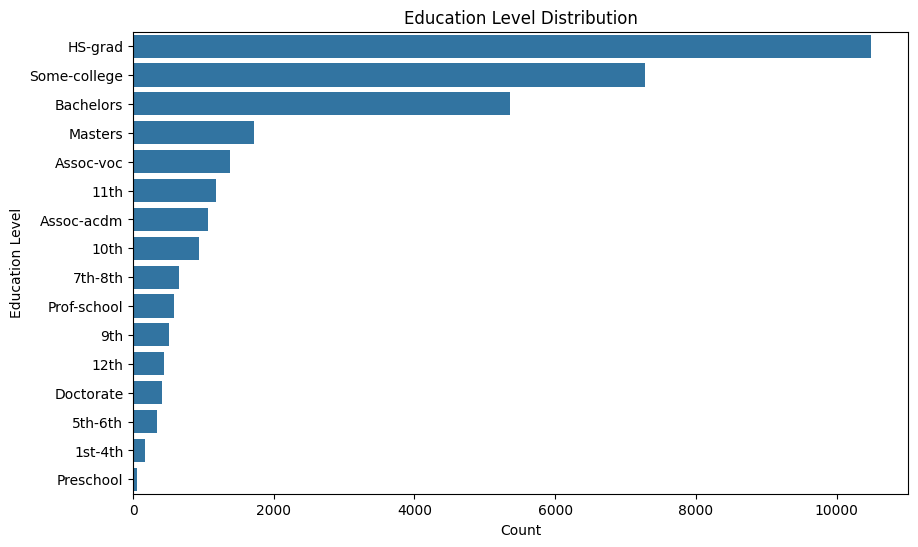

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, y='education', order=df_train['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

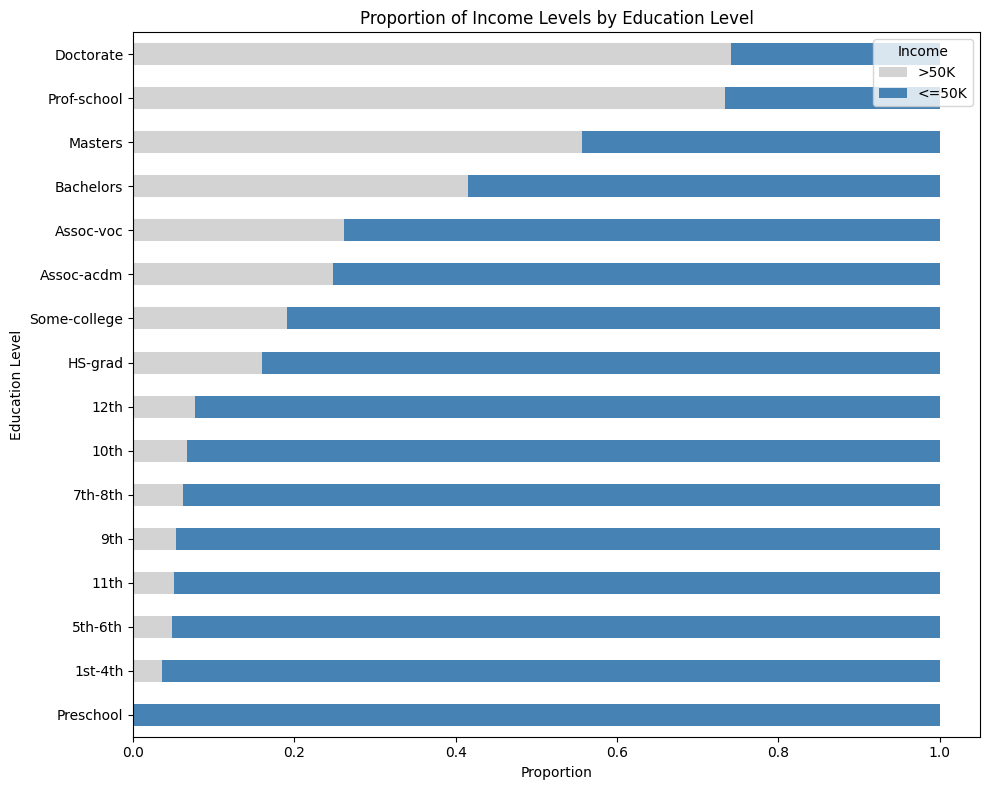

In [ ]:
# Calculate proportions
edu_income = df_train.groupby('education')['income'].value_counts(normalize=True).unstack().fillna(0)
edu_income = edu_income[['>50K', '<=50K']]  # Ensure consistent order

# Plot as a horizontal stacked bar
edu_income.sort_values('>50K', inplace=True)

edu_income.plot(kind='barh', stacked=True, figsize=(10, 8), color=['lightgray', 'steelblue'])
plt.title('Proportion of Income Levels by Education Level')
plt.xlabel('Proportion')
plt.ylabel('Education Level')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
<b>The most earned degree among participants is "HS-grad"</b>, which is significantly more common than other education levels in the dataset. This is evident from the distribution of the education feature, where "HS-grad" has the highest frequency, indicating that a majority of participants have completed high school education.

<b>Regarding the connection between education level and income, the analysis reveals a clear relationship.</b> The visualizations, particularly the stacked bar chart, indicate that higher education levels are associated with a higher proportion of individuals earning more than 50K. For instance, those with "Doctorate" and "Masters" degrees show a substantially larger proportion of high earners compared to those with lower educational attainments such as "HS-grad" or "Some-college". This suggests that education plays a significant role in determining income, with advanced education levels correlating strongly with higher income categories.
</p>
</font>
<hr>

### Exploring the Relationship Between Nationality and Income

Exploring the income distribution across different nationalities reveals trends in earnings. This analysis can highlight which nationalities are more likely to earn higher income, providing insights into the potential socio-economic factors associated with nationality in the dataset

---

Tasks:
- Plot Nationality Distribution
- Compare Nationality vs. Income
- Identify Dominant Nationality with Highest Income Proportion

#### Task 1: Plot Nationality Distribution

Visualize the distribution of nationalities in the dataset to understand the representation of individuals from different countries. This will help in assessing the relative population of each nationality before comparing their income distributions

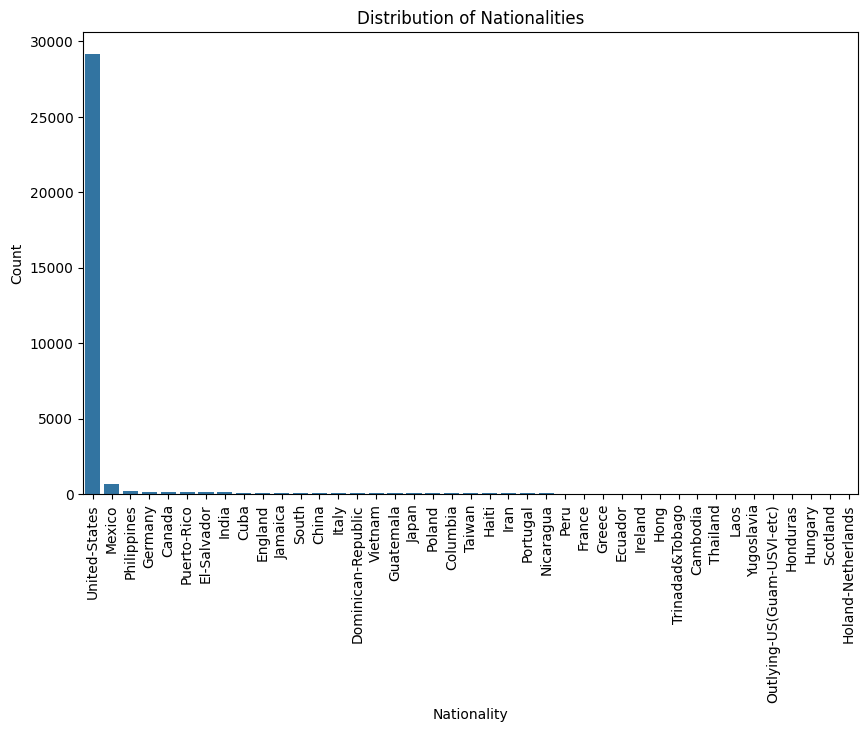

In [ ]:
# Plot Nationality Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='native-country', order=df_train['native-country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

#### Task 2: Compare Nationality vs. Income

Compare the income levels (`<=50K` and `>50K`) across different nationalities. This analysis will show how income distribution varies by nationality, helping to identify trends in income disparity among different nationalities.

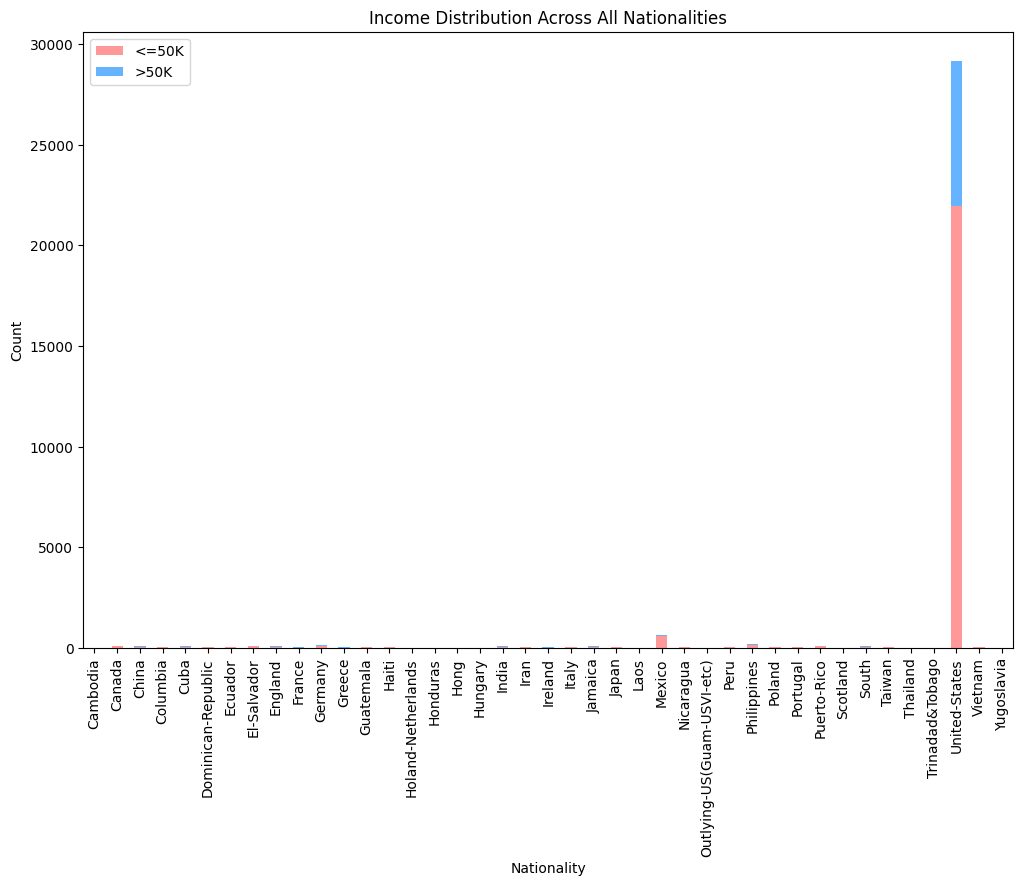

In [ ]:
# Group by nationality and income level
nationality_income_dist = df_train.groupby(['native-country', 'income']).size().unstack().fillna(0)

# Plot income vs nationality for all nationalities
nationality_income_dist.plot(kind='bar', stacked=True, figsize=(12,8), color=['#ff9999', '#66b3ff'])
plt.title('Income Distribution Across All Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['<=50K', '>50K'])
plt.show()

Filter out the dominant nationality (the one with the highest population proportion) and perform the analysis on the remaining nationalities. This will help focus on the income distribution across nationalities excluding the one with the most significant representation, offering a more nuanced view of the income distribution among less-represented nationalities.

---
Answer Following Question:
- Which nationality is the second most populous in America, and what is their income distribution? What factors might explain these income patterns?

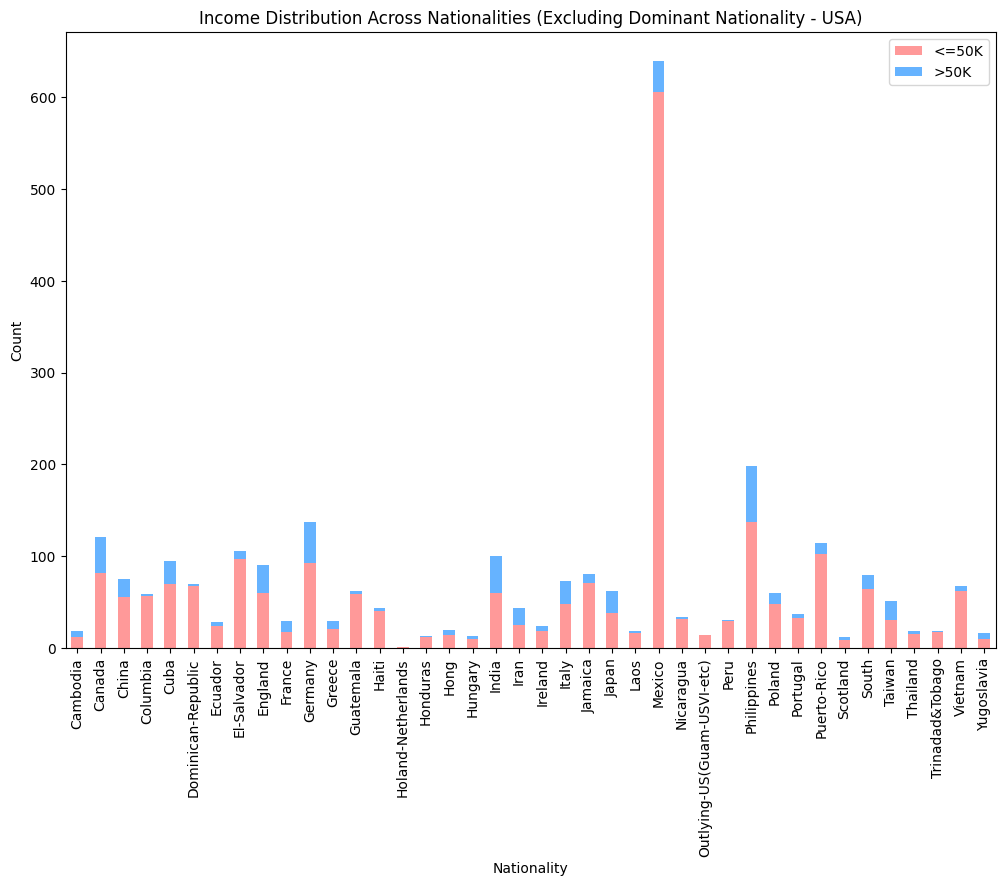

In [ ]:
# Group by nationality and income level
nationality_income_dist = df_train.groupby(['native-country', 'income']).size().unstack().fillna(0)

# Filter out the dominant nationality (most populous one)
dominant_nationality = df_train['native-country'].value_counts().idxmax()
filtered_nationalities = nationality_income_dist.drop(dominant_nationality)

# Plot income vs nationality for remaining nationalities
filtered_nationalities.plot(kind='bar', stacked=True, figsize=(12,8), color=['#ff9999', '#66b3ff'])
plt.title('Income Distribution Across Nationalities (Excluding Dominant Nationality - USA)')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['<=50K', '>50K'])
plt.show()

<p align="justify"> <font size=4> <b> <font color='red'>Your Answer:</font></b><br> The second most populous nationality in the dataset is <b>Mexico</b>. From the income distribution analysis, we observe that a large proportion of individuals from this nationality earn <b><=50K</b>, with a smaller proportion earning <b>>50K</b>. Factors that might explain these income patterns include historical socio-economic conditions, access to education, and the types of industries where this group is predominantly employed. Additionally, immigration patterns and geographic location in areas with lower-paying jobs may contribute to these earnings disparities. </p> </font> <hr>

#### Task 3: Identify Dominant Nationality with Highest Income Proportion

Identify the nationality with the highest proportion of individuals earning more than 50K. This analysis helps highlight nationalities that are more likely to achieve higher earnings, providing insight into socio-economic patterns

---

Answer the folloiwng Question:
- What is the nationality with the highest proportion of individuals earning more than 50K? can you explain that?

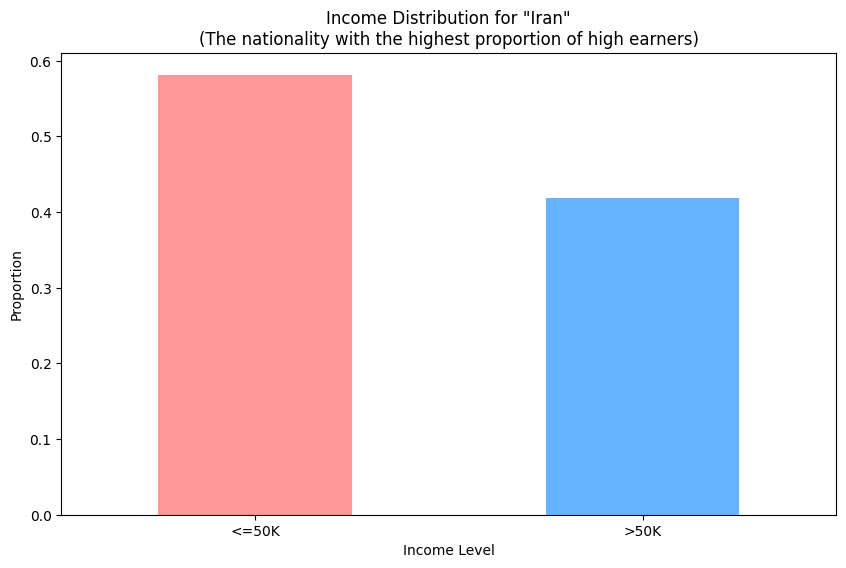

In [ ]:
# Calculate the proportion of individuals earning >50K for each nationality
income_proportion = df_train.groupby(['native-country', 'income']).size().unstack().fillna(0)

# Normalize by dividing each income level count by the total for each nationality
income_proportion = income_proportion.div(income_proportion.sum(axis=1), axis=0)

# Identify the nationality with the highest proportion of individuals earning >50K
highest_income_proportion_nationality = income_proportion['>50K'].idxmax()

# Plot the income distribution for the nationality with the highest >50K proportion
income_proportion.loc[highest_income_proportion_nationality].plot(kind='bar', color=['#ff9999', '#66b3ff'], figsize=(10,6))
plt.title(f'Income Distribution for "{highest_income_proportion_nationality}"\n(The nationality with the highest proportion of high earners)')
plt.xlabel('Income Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

<p align="justify"> <font size=4> <b> <font color='red'>Your Answer:</font></b><br> The nationality with the highest proportion of individuals earning more than 50K is <b>Iran</b>. This group shows a substantially higher proportion of individuals earning more than 50K compared to other nationalities. Several factors may explain this pattern, including better access to higher-paying industries, a larger proportion of individuals with advanced degrees.</p> </font> <hr>

### Exploring Hours per Week Distribution

#### Task 1: Plot hours-per-week distribution
Plot KDE and histogram of hours-per-week and determine typical work hours.


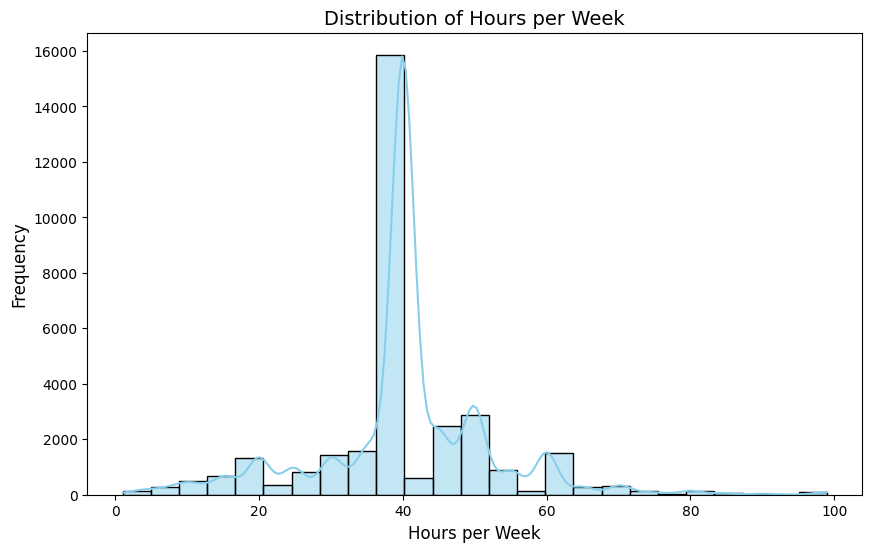

In [ ]:
# Plot hours-per-week distribution
plt.figure(figsize=(10, 6))

# Plotting KDE and histogram
sns.histplot(df_train['hours-per-week'], kde=True, color='skyblue', bins=25)

# Adding labels and title
plt.title('Distribution of Hours per Week', fontsize=14)
plt.xlabel('Hours per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

### Exploring the Relationship Between Sex and Income

#### Task 1: Plot and Compare Sex in the Dataset

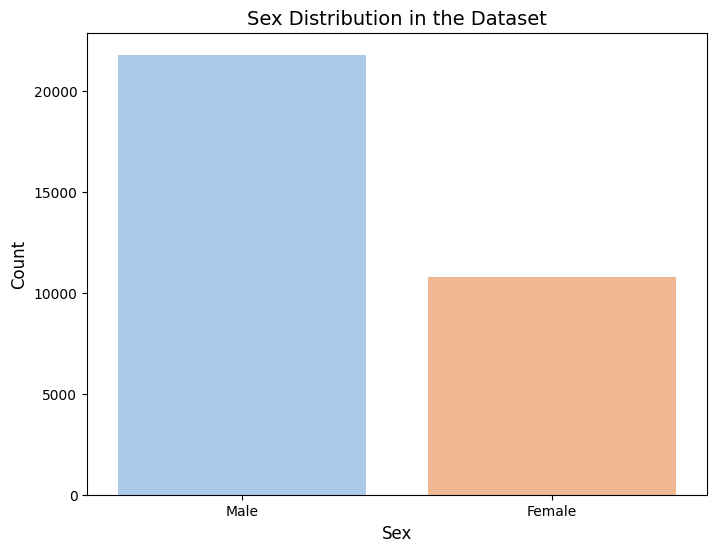

In [ ]:
# Plot and Compare Sex in the Dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df_train, hue='sex', palette='pastel', legend=False)

# Adding labels and title
plt.title('Sex Distribution in the Dataset', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

#### Task 2: Plot and Compare Income by Gender

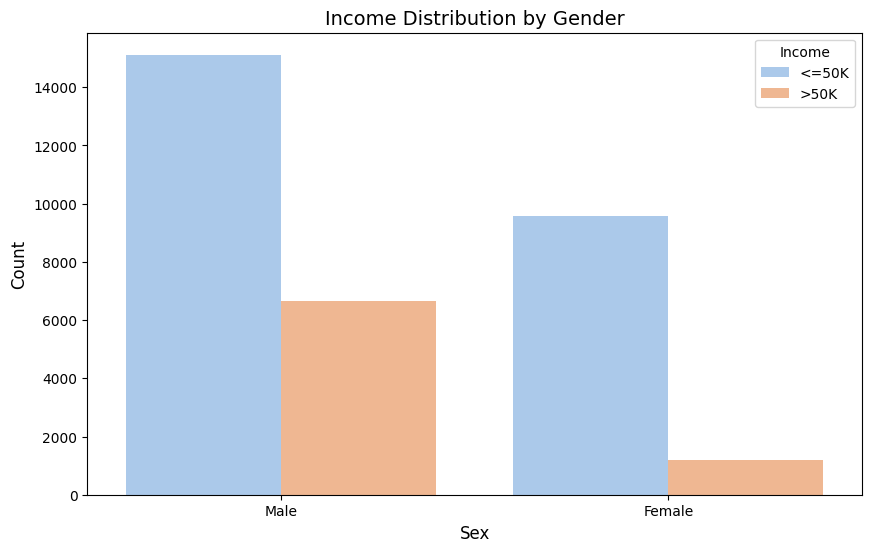

In [ ]:
# Plot and Compare Income by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=df_train, palette='pastel')

# Adding labels and title
plt.title('Income Distribution by Gender', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

### Exploring Relationship between Age and Income

#### Task 1: Visualize the Distribution of Age vs. Income using violinplot

Answer the following questions:

- What patterns can be observed in the age group with income above 50k?

- Is it common for younger individuals to have an income above 50k?

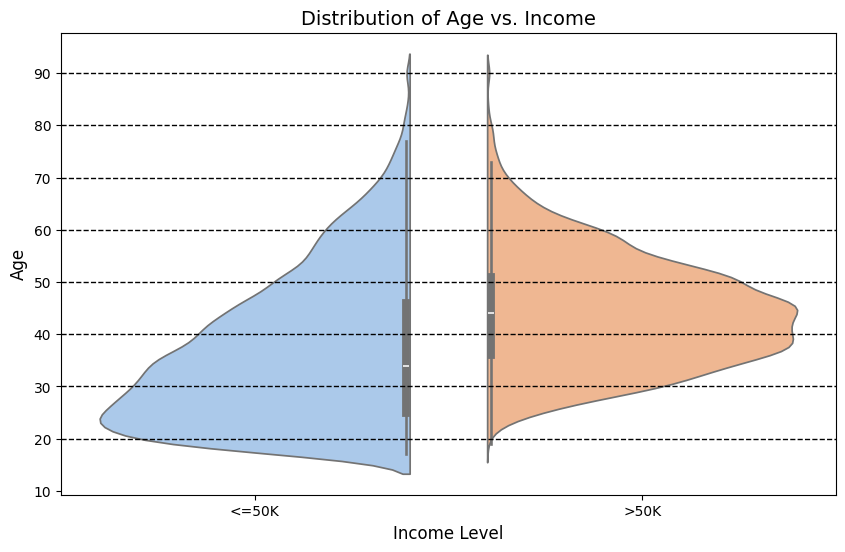

In [ ]:
# Visualize the Distribution of Age vs. Income using violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='age', data=df_train, hue='income', palette='pastel', split=True)

# Adding horizontal lines for each decade of age
age_decades = range(20, 91, 10)  # From 20 to 90, step of 10
for age in age_decades:
    plt.axhline(y=age, color='black', linestyle='--', linewidth=1)

# Adding labels and title
plt.title('Distribution of Age vs. Income', fontsize=14)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
The age group with income above 50K tends to be concentrated in the middle-aged range, with fewer young and elderly individuals earning above 50K. The plot might show that <b>the majority of individuals with higher income are in their 30s to 50s (35-50)</b>, with a more compact distribution of age.

<b>It is relatively uncommon for younger individuals (those in their 20s) to have an income above 50K.</b> The distribution of higher-income earners seems to increase with age, as older individuals tend to have more experience and higher-paying jobs.

</p>
</font>
<hr>

#### Task 2: Visualize and Compare the Age Distribution Across Different Races using a Violin Plot

Answer the Following question:
- Which race has the highest concentration of middle-aged individuals?

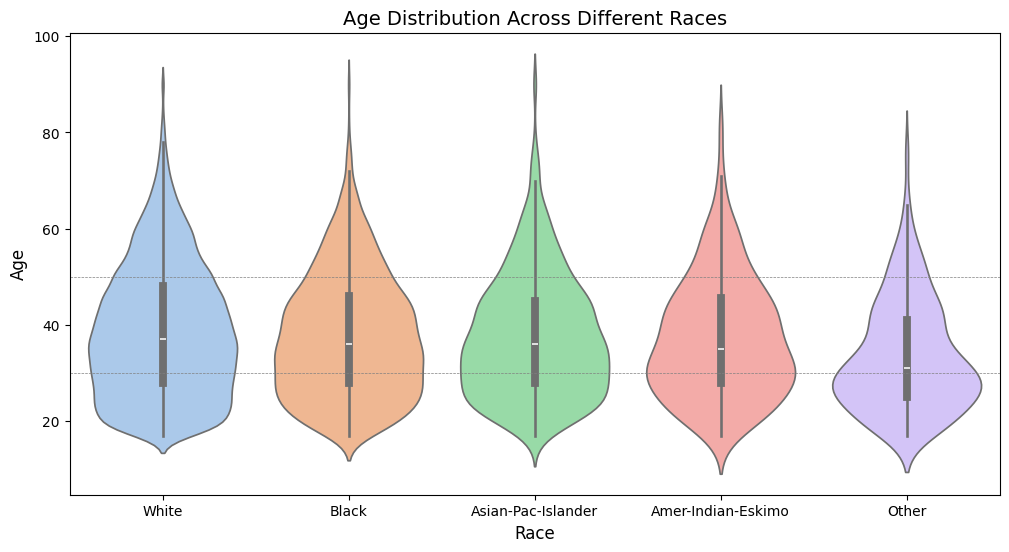

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='race', y='age', data=df_train, hue='race', palette='pastel', legend=False)

# Add horizontal lines for decades
for decade in range(30, 51, 20): # 30-50 -> Middle-aged
    plt.axhline(y=decade, color='gray', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.title('Age Distribution Across Different Races', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>
Based on the violin plot, <b>White</b> race has a higher density in the middle-aged range (typically between 30 to 50 years).
</p>
</font>
<hr>

### Exploring Relationship between Race and Income

#### Task 1: Visualize the Income Distribution Across Different Races

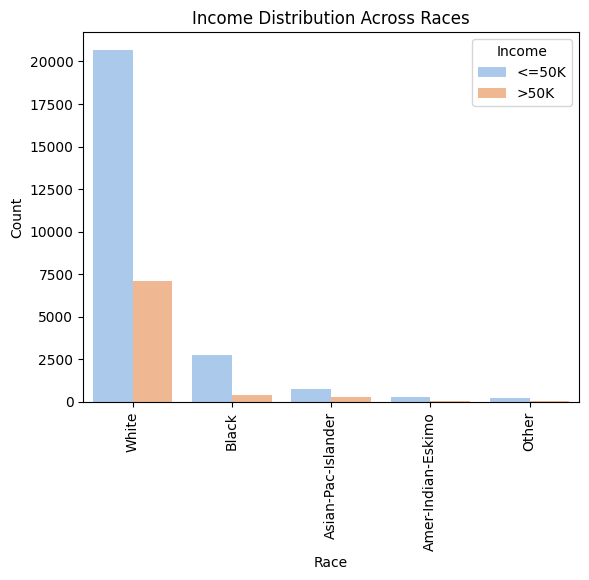

In [ ]:
# Countplot to visualize income distribution across races
sns.countplot(data=df_train, x='race', hue='income', palette='pastel')
plt.title('Income Distribution Across Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

#### Task 2: Plot and Sort Races Based on the Highest Proportion of High-Income Individuals Across Races

Answer the following question:

- Which race has the highest proportion of high-income individuals?

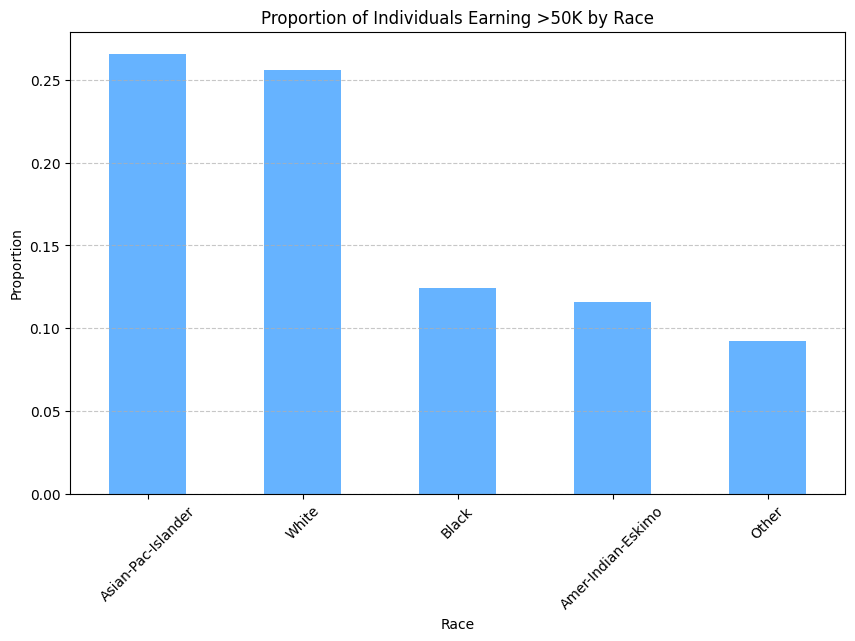

In [ ]:
# Calculate proportions of >50K income by race
race_income_ratio = df_train.groupby('race')['income'].value_counts(normalize=True).unstack().fillna(0)
race_income_ratio['>50K_proportion'] = race_income_ratio['>50K']

# Sort and plot
race_income_ratio = race_income_ratio.sort_values(by='>50K_proportion', ascending=False)
race_income_ratio['>50K_proportion'].plot(kind='bar', color='#66b3ff', figsize=(10,6))
plt.title('Proportion of Individuals Earning >50K by Race')
plt.ylabel('Proportion')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p align="justify"><font size=4><b><font color='red'>Your Answer:</font></b><br> According to the bar plot, <b>Asian-Pac-Islander</b> has the highest proportion of individuals earning more than 50K. This could be influenced by educational attainment and employment in higher-paying professional or technical roles common in this demographic. </p></font><hr>

### Exploring the Relationship Between Marital Status and Income


- Similar to the previous sections, use various plots to explore and identify patterns between the `Relationship`, `Marital Status`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

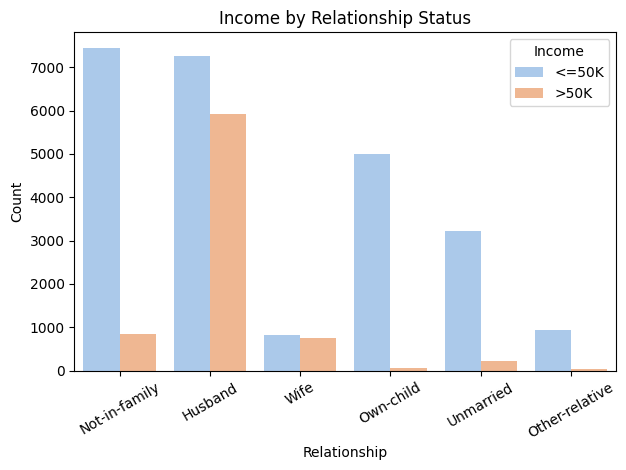

In [ ]:
sns.countplot(data=df_train, x='relationship', hue='income', palette='pastel')
plt.title('Income by Relationship Status')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

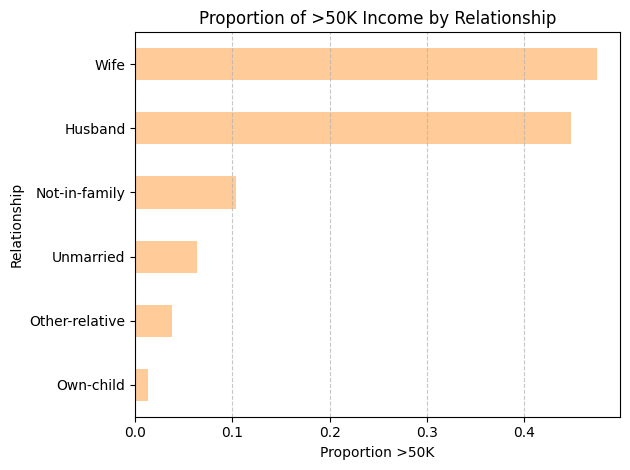

In [ ]:
relationship_income = df_train.groupby('relationship')['income'].value_counts(normalize=True).unstack().fillna(0)
relationship_income['>50K_proportion'] = relationship_income['>50K']

relationship_income['>50K_proportion'].sort_values().plot(kind='barh', color='#ffcc99')
plt.title('Proportion of >50K Income by Relationship')
plt.xlabel('Proportion >50K')
plt.ylabel('Relationship')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

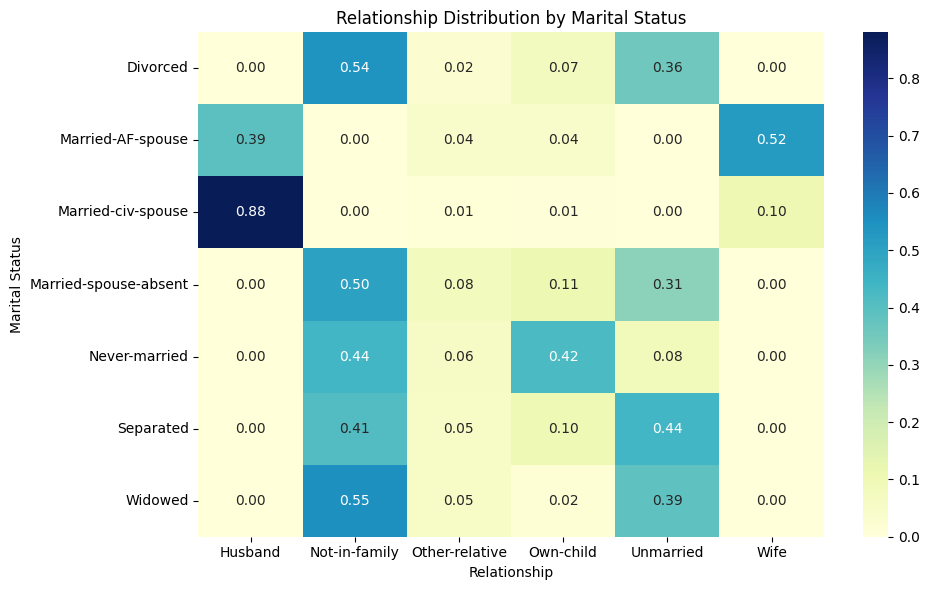

In [ ]:
# Crosstab between marital-status and relationship
marital_relationship_ct = pd.crosstab(df_train['marital-status'], df_train['relationship'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(marital_relationship_ct, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Relationship Distribution by Marital Status')
plt.xlabel('Relationship')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()

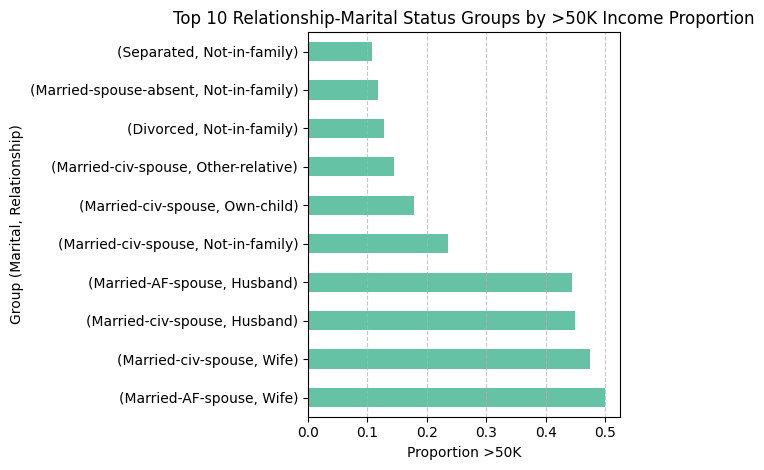

In [ ]:
# Combined effect: average income proportion by both relationship and marital-status
combined_group = df_train.groupby(['marital-status', 'relationship'])['income'].value_counts(normalize=True).unstack().fillna(0)
combined_group['>50K_proportion'] = combined_group['>50K']
sorted_combined = combined_group['>50K_proportion'].sort_values(ascending=False).head(10)

# Plot top 10 groups
sorted_combined.plot(kind='barh', color='#66c2a5')
plt.title('Top 10 Relationship-Marital Status Groups by >50K Income Proportion')
plt.xlabel('Proportion >50K')
plt.ylabel('Group (Marital, Relationship)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Exploring the Relationship Between Occupation, Workclass and Income

- Similar to the previous sections, use various plots to explore and identify patterns between the `Occupation`, `Workclass`, and `Income` features. You are free to choose any types of plots that you find suitable for the analysis.

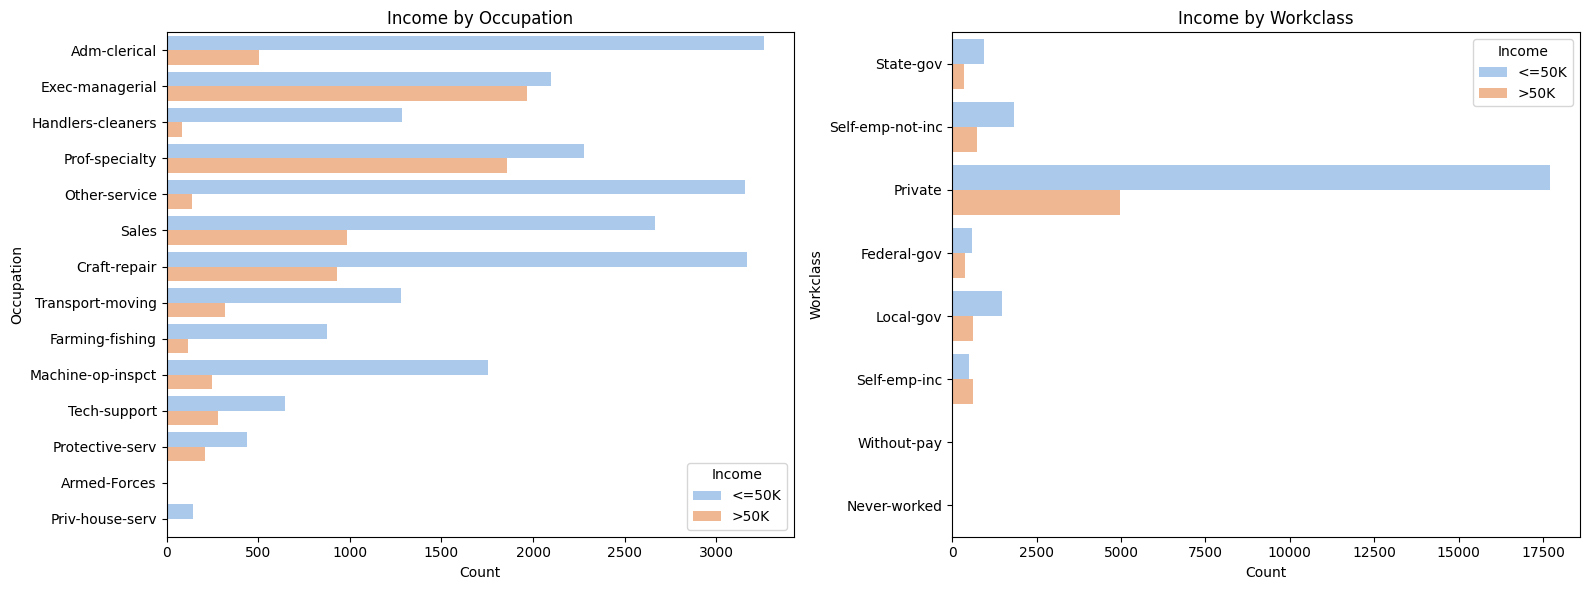

In [ ]:
# Set up the side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)

# Plot Occupation vs. Income
sns.countplot(data=df_train, y='occupation', hue='income', palette='pastel', ax=axes[0])
axes[0].set_title('Income by Occupation')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Occupation')
axes[0].legend(title='Income')

# Plot Workclass vs. Income
sns.countplot(data=df_train, y='workclass', hue='income', palette='pastel', ax=axes[1])
axes[1].set_title('Income by Workclass')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Workclass')
axes[1].legend(title='Income')

# Layout adjustments
plt.tight_layout()
plt.show()

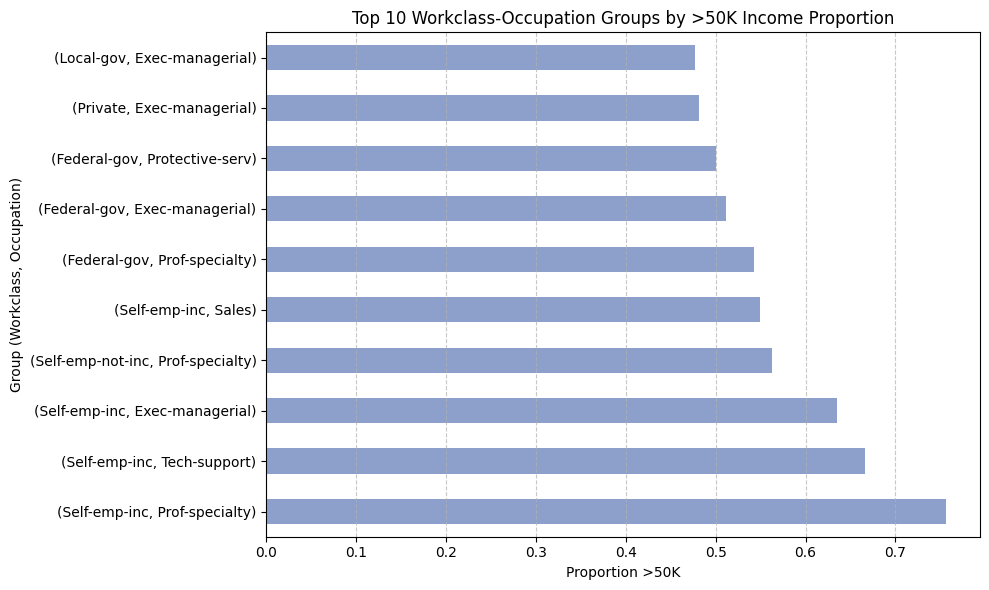

In [ ]:
# Group by both occupation and workclass
combined_occ_wc = df_train.groupby(['workclass', 'occupation'])['income'].value_counts(normalize=True).unstack().fillna(0)

# Add column for high-income proportion
combined_occ_wc['>50K_proportion'] = combined_occ_wc['>50K']

# Sort and select top 10 combinations
sorted_occ_wc = combined_occ_wc['>50K_proportion'].sort_values(ascending=False).head(10)

# Plot
sorted_occ_wc.plot(kind='barh', color='#8da0cb', figsize=(10,6))
plt.title('Top 10 Workclass-Occupation Groups by >50K Income Proportion')
plt.xlabel('Proportion >50K')
plt.ylabel('Group (Workclass, Occupation)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Describing the Final Persona

Based on the insights from the previous sections, describe a persona that has a high likelihood of earning above 50k in a year. Consider factors such as age, race, marital status, and relationship status to outline the characteristics of this individual.

<p align="justify"><font size=4><b><font color='red'>Your Answer:</font></b><br> <b>The ideal persona would be a middle-aged (35-50 years), White or Asian-Pac-Islander individual with a Master's or Doctorate degree, likely from Iran, and married with a spouse.</b></p></font><hr>

# Step 4: Handle Missing Values


There are several ways to deal with missing values. Below are some common strategies:

### Missing Value Strategies

#### For **numerical features**:
- `Drop rows` that have missing values
- `Fill with mean`
- `Fill with median`
- `Use KNN or regression imputation`

#### For **categorical features**:
- `Drop rows` with missing categories
- `Fill with the most frequent value` (mode)
- `Fill with a new category` like "Unknown"
- `Use model-based imputation`

---

 **Task**:  
1. **Which method(s) do you think are best for this dataset?**  
2. **Why?** Consider the number of missing values, the type of features, and how it may affect modeling.  
3. Implement your chosen strategy below.


In [ ]:
# Identify missing values in training and test datasets

print("Missing values in training data:\n")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

print("\nMissing values in test data:\n")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

Missing values in training data:

workclass         1836
occupation        1843
native-country     583
dtype: int64

Missing values in test data:

workclass         963
occupation        966
native-country    274
dtype: int64


In [ ]:
# Inspect unique values in the affected columns to understand their distribution

print("\nUnique values in 'workclass':\n", df_train['workclass'].unique())
print("\nUnique values in 'occupation':\n", df_train['occupation'].unique())
print("\nUnique values in 'native-country':\n", df_train['native-country'].unique())


Unique values in 'workclass':
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in 'occupation':
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values in 'native-country':
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [ ]:
# Impute missing (categorical) values with mode (most frequent value)
categorical_missing_cols = ['workclass', 'occupation', 'native-country']

for col in categorical_missing_cols:
    mode_val = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(mode_val)
    df_test[col] = df_test[col].fillna(mode_val)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

Filled missing values in 'workclass' with mode: Private
Filled missing values in 'occupation' with mode: Prof-specialty
Filled missing values in 'native-country' with mode: United-States


In [ ]:
# Step 5: Final check to ensure all missing values are handled

print("\nRemaining missing values in training data:", df_train.isnull().sum().sum())
print("Remaining missing values in test data:", df_test.isnull().sum().sum())


Remaining missing values in training data: 0
Remaining missing values in test data: 0


<p align="justify"> <font size=4> <b> <font color='red'>Your Answer:</font></b><br>
Since all the columns with missing values in this dataset are categorical (workclass, occupation, and native-country), the most suitable and effective strategy is to fill missing values with the most frequent value (mode) from the training data. This ensures that we maintain data integrity without introducing bias from the test set, and avoids unnecessary loss of data from dropping rows
<br><br>

I choose this strategy for several reasons:

<ul> <li>The number of missing values is relatively small compared to the total number of rows, so filling rather than dropping preserves most of the dataset.</li> <li>All missing values are in <b>categorical columns</b>, and using the <b>mode</b> ensures the most likely and reasonable category is imputed.</li> <li>Using the mode from the <b>training set only</b> prevents <b>data leakage</b> — a critical concern in any machine learning pipeline.</li> <li>This approach is simple, fast, and effective, especially when the missingness is random and the mode is clearly dominant in the feature's distribution.</li> </ul><br>

# Step 5: Identify Categorical Features


Most machine learning models require numerical input. We must convert **categorical columns** to numbers.

There are several encoding methods. Each method has strengths and weaknesses depending on the dataset and the type of model you're using.

---

### Common Encoding Techniques

1. **One-Hot Encoding**  
2. **Label Encoding**  
3. **Frequency Encoding**  
4. **Target / Mean Encoding**  
5. **Binary Encoding**  
6. **Hash Encoding**

---

 **Your Task**:

1. Research the methods above (or based on what we've discussed in class).
2. For each method, briefly write down:
   - When you might use it
   - Its potential pros and cons
3. Choose the one(s) you think work best for this dataset.
4. Explain **why** your choice is appropriate.
5. Implement your encoding method(s) in the code cell below.




## Encoding Methods Overview

- One-Hot Encoding<br>
Use When: The feature has low cardinality (few unique values).<br>
Pros: Doesn't assume any ordinal relationship. Works well with linear models and tree-based models.<br>
Cons: Increases dimensionality rapidly with high-cardinality features (curse of dimensionality).

<br>

- Label Encoding<br>
Use When: The feature has ordinal categories (e.g., education levels).<br>
Pros: Simple; no extra columns created.<br>
Cons: Implies ordering between categories which may mislead models if not true.

<br>

- Frequency Encoding<br>
Use When: Medium-to-high cardinality categorical features.<br>
Pros: Simple; encodes useful distributional information.<br>
Cons: Can leak target information if not properly split; may not be interpretable.

<br>

- Target / Mean Encoding<br>
Use When: High-cardinality categorical features and target variable is available.<br>
Pros: Often boosts performance in tree-based models.<br>
Cons: High risk of data leakage if not used with cross-validation or separate folds.

<br>

- Binary Encoding<br>
Use When: Moderate to high cardinality categorical features.<br>
Pros: Lower dimensionality than one-hot; good for tree-based models.<br>
Cons: Harder to interpret.

<br>

- Hash Encoding<br>
Use When: Very high cardinality; especially in production or streaming data.<br>
Pros: Constant memory usage.<br>
Cons: Risk of collisions; less interpretable; not deterministic.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# For binary features like sex and income, we can use Label Encoding (0 or 1 for each category)

binary_features = ['sex', 'income']

# Apply label encoding to both train and test datasets for binary features
le = LabelEncoder()

for feature in binary_features:
    df_train[feature] = le.fit_transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])  # Important: Don't fit the test set again
    print(f"Encoded '{feature}' feature: {df_train[feature].unique()}")

# Ordinal Encoding for 'education' based on predefined order
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate'
]

education_mapping = {level: idx for idx, level in enumerate(education_order)}

# Apply to both train and test sets
df_train['education'] = df_train['education'].map(education_mapping)
df_test['education'] = df_test['education'].map(education_mapping)

print("Encoded 'education' feature: ", df_train['education'].unique())

# One-Hot Encoding for the remaining non-binary categorical features
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# Apply One-Hot Encoding to the categorical features
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform on the training data, transform on test data
df_train_ohe = ohe.fit_transform(df_train[categorical_features])
df_test_ohe = ohe.transform(df_test[categorical_features])

# Convert to DataFrame to keep the column names consistent
df_train_ohe = pd.DataFrame(df_train_ohe, columns=ohe.get_feature_names_out(categorical_features))
df_test_ohe = pd.DataFrame(df_test_ohe, columns=ohe.get_feature_names_out(categorical_features))

# Concatenate the One-Hot Encoded columns with the original datasets
df_train = pd.concat([df_train.drop(categorical_features, axis=1), df_train_ohe], axis=1)
df_test = pd.concat([df_test.drop(categorical_features, axis=1), df_test_ohe], axis=1)

# Check final encoded shapes
print("\nEncoded train shape:", df_train.shape)
print("Encoded test shape:", df_test.shape)

Encoded 'sex' feature: [1 0]
Encoded 'income' feature: [0 1]
Encoded 'education' feature:  [12  8  6 13  4  9 11 10  3 15 14  2  5  1  0  7]

Encoded train shape: (32561, 84)
Encoded test shape: (16281, 84)


<p align="justify"> <font size=4> <b> <font color='red'>Your Answer:</font></b><br>

For this dataset, I selected a combination of encoding strategies tailored to the nature of each categorical feature:

- <b>Binary Encoding</b> was used for binary categorical variables like <b>'sex'</b> and <b>'income'</b>. These features have only two categories and do not require the complexity of one-hot encoding. Binary encoding is efficient and preserves simplicity without introducing unnecessary dimensionality.

- <b>Ordinal Encoding</b> was applied to the <b>'education'</b> feature, as its categories represent a clear hierarchy. Preserving this natural order allows machine learning models to learn from the inherent educational progression, which could be highly predictive for income classification.

- <b>One-Hot Encoding</b> (with drop='first' to avoid multicollinearity) was applied to nominal categorical variables such as <b>'workclass', 'marital-status', 'occupation', 'relationship', 'race',</b> and <b>'native-country'</b>. These features do not have an inherent order and one-hot encoding ensures that models do not assume any ordinal relationship between categories.

<br>
This multi-strategy encoding approach is appropriate for this dataset because it balances performance, model interpretability, and computational efficiency, while respecting the semantic meaning of each feature type.

</p> </font> <hr>

# Step 6: Correlation Matrix (Numerical Features)

Correlation helps us understand how strongly features are related to each other.  
This is useful for:
- Detecting multicollinearity (when features are too similar)
- Spotting features that might be predictive of the target variable

We'll compute the correlation matrix and visualize it with a heatmap.


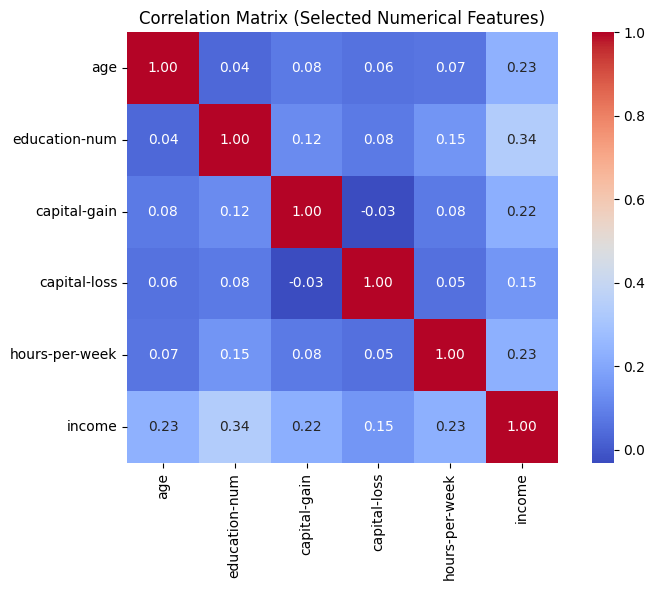

In [ ]:
# Select relevant numerical features including the binary target 'income' (and excluding 'fnlwgt')
num_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

# Compute the correlation matrix
corr_matrix = df_train[num_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix (Selected Numerical Features)")
plt.tight_layout()
plt.show()

# Step 7: Feature Scaling

Before addressing class imbalance, we apply feature scaling to the numerical features.
Scaling ensures that features contribute equally to the model training process and improves convergence for many machine learning algorithms.

### Scaling Methods:

#### 1. StandardScaler
- standardizes features by removing the mean and scaling to unit variance.

#### 2. MinMaxScaler
- scales features to a given range (usually [0, 1]).

#### 3. MaxAbsScaler

- scales features by their maximum absolute value.

#### 4. RobustScaler
- scales features using statistics that are robust to outliers.

#### 5. Normalizer
- scales individual samples to have unit norm.

---
 **Your Task**:
1. Choose a scaling method and explain your reasoning.
2. Implement your chosen method below.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical features to scale
numerical_features = ['age', 'education', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Initialize the scaler (StandardScaler)
scaler = StandardScaler()

# Fit on train, transform both train and test
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

I chose <b>StandardScaler</b> because it is <b>the most common and effective method when features have different units and ranges, and most algorithms like Logistic Regression, SVM, and KNN</b> perform better when data is standardized (mean = 0, standard deviation(std) = 1).
<br>Also, StandardScaler is <b>less sensitive to outliers</b> compared to MinMaxScaler.

</p>
</font>
<hr>

# Step 8: Dealing with Class Imbalance

### Identifying Class Imbalance
In classification problems, it is common to have **imbalanced** classes, where one class has far more examples than the other. This can negatively impact model performance since many standard algorithms assume a balanced dataset.

**Question**: Where do we use resampling?

Our target variable `income` is imbalanced — most people earn `<=50K`.

This imbalance can cause models to:
- Be biased toward the majority class
- Fail to learn patterns of the minority class

### Resampling Techniques

#### 1. Random OverSampling
- Duplicate samples from the minority class

#### 2. Random UnderSampling
- Remove samples from the majority class

#### 3. SMOTE (Synthetic Minority Over-sampling Technique)
- Generate new synthetic samples from the minority class

---

 **Your Task**:
1. Inspect the class distribution.
2. Choose a resampling strategy and explain your reasoning.
3. Implement your strategy below.


Class distribution of 'income':
 income
0    24720
1     7841
Name: count, dtype: int64


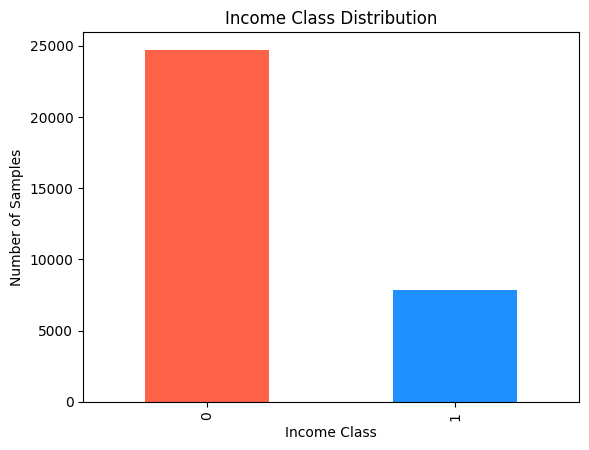

In [ ]:
# Inspect the class distribution for the target variable 'income'
class_distribution = df_train['income'].value_counts()
print("Class distribution of 'income':\n", class_distribution)

# Visualize the class distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['#FF6347', '#1E90FF'], title='Income Class Distribution')
plt.xlabel('Income Class')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate the features and the target
X_train = df_train.drop('income', axis=1)
y_train = df_train['income']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of classes after resampling
print("Class distribution after resampling:\n", y_train_resampled.value_counts())

Class distribution after resampling:
 income
0    24720
1    24720
Name: count, dtype: int64


<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

<b>Resampling is needed</b> in this case. With the majority class (`<=50K`) comprising about 75% of the dataset, we are dealing with a moderate class imbalance. This can bias the model toward predicting the majority class more frequently, which reduces its ability to correctly identify instances of the minority class.  
<br>
<b>SMOTE (Synthetic Minority Over-sampling Technique)</b> is an effective solution here, as it generates new, synthetic examples of the minority class based on nearest neighbors rather than simply duplicating existing samples. This helps the model generalize better and learn meaningful patterns in both classes without risking overfitting or discarding valuable data.
</font>
</p>
<hr>

### Re-evaluating the Need for Resampling:  
<b> <font color='red'>Question:</font></b> In this case, should we use resampling or not, and why?  

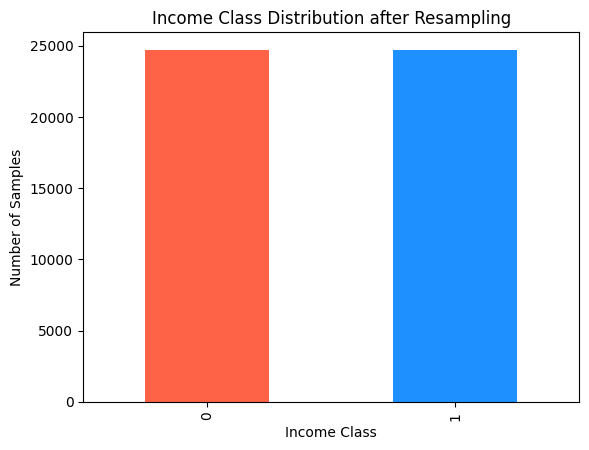

In [ ]:
resampled_class_distribution = y_train_resampled.value_counts()
resampled_class_distribution.plot(kind='bar', color=['#FF6347', '#1E90FF'], title='Income Class Distribution after Resampling')
plt.xlabel('Income Class')
plt.ylabel('Number of Samples')
plt.show()

<p align="justify">
<font size=4>
<b> <font color='red'>Your Answer:</font></b><br>

No, there is no need to apply resampling again. We already performed resampling once, which adjusted the dataset to have a balanced 50-50 distribution between the two income classes. Applying resampling again would be redundant and could even distort the data by introducing unnecessary duplication or synthetic points.

</p>
</font>
<hr>

# Step 9: Modeling and Evaluation

In this part of the project, you will apply and compare several machine learning models on the training dataset. Each model uses a different mathematical approach to learn from the data and make predictions. Your goal is to identify the most effective model based on the evaluation metrics and determine which model provides the best generalization to unseen data.

## 9.1 Overview of the Modeling Section
You need to implement a range of classifiers that represent different types of machine learning algorithms, including:

- **K-Nearest Neighbors (KNN):** A simple, non-parametric method that makes predictions based on the majority class of the nearest neighbors in the feature space.
- **Decision Trees:** A tree-like model where decisions are made based on feature values, with each branch representing a feature condition and each leaf representing a class label.
- **Random Forest:** An ensemble of decision trees that improves prediction accuracy by averaging multiple models to reduce overfitting.
- **Gradient Boosting Methods (XGBoost, LightGBM):** Advanced ensemble techniques that build trees sequentially, where each new tree attempts to correct the errors of the previous one.
- **Logistic Regression:** A linear model used for binary or multi-class classification that predicts the probability of class membership.
- **Support Vector Machines (SVM):** A classifier that finds the hyperplane that best separates data points of different classes.
- **Neural Networks:** A class of models inspired by biological neural networks, capable of learning complex patterns in large datasets.

**Write a function that:**

- **Takes** `y_test` (true labels) and `y_pred` (predicted labels),
- **Computes**: Accuracy, Precision, Recall, F1,
- **Plots**: ROC Curve + AUC and Precision-Recall curve,
- **Displays**: Confusion Matrix.

**Note: You may need to read Part 13 before implementing this function.**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
)

def evaluate_model(y_test, y_pred, y_proba=None, model_name="Model"):
    print(f"--- {model_name} Evaluation ---")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    if y_proba is not None and len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.figure()
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} - Precision-Recall Curve')
        plt.show()

###1)K-Nearest Neighbors (KNN)

KNN is a simple algorithm that makes predictions based on the closest data points in the training set. It looks at the ‘K’ nearest neighbors (based on distance) to a new point and assigns the most common class among those neighbors.

 **Your Task**:
1.  Implement and train the KNN classifier on the training dataset.(and then evaluate it on the test dataset)

--- KNN Evaluation ---
Accuracy: 0.6030
Precision: 0.2880
Recall: 0.4620
F1 Score: 0.3548


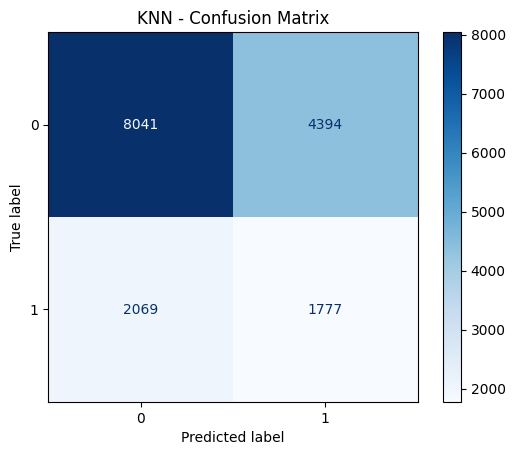

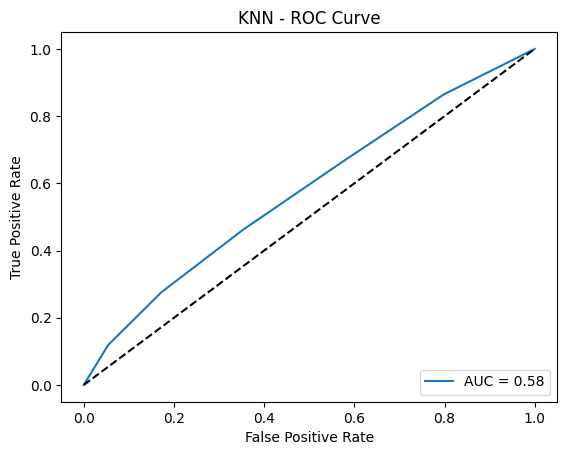

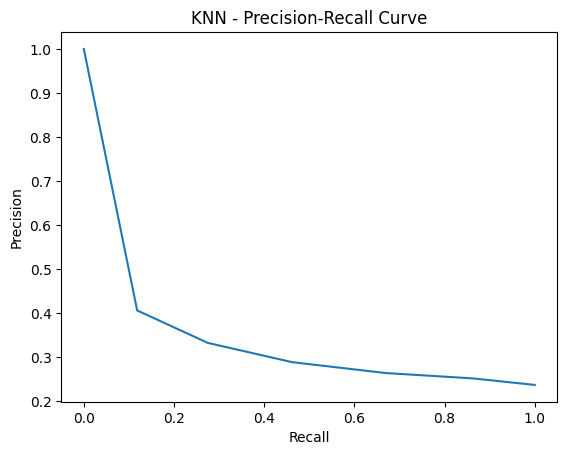

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Separate features (X) and target (y) for both training and testing sets
X_train = X_train_resampled
y_train = y_train_resampled
X_test = df_test.drop('income', axis=1)
y_test = df_test['income']

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:,1] # Probability estimates for ROC and PR curves


evaluate_model(y_test, y_pred, y_proba, model_name="KNN")

2. Answer this question:How does  'K' in KNN  affect the model's performance?

<b> <font color='red'>Your Answer:</font></b><br>
The 'K' in KNN determines <b>how many neighbors vote when classifying a point.</b> A small K may lead to overfitting (sensitive to noise), while a large K makes the model more stable but potentially underfits. The best K is usually found using cross-validation.



###2)Decision Tree

A decision tree makes predictions by splitting the data into smaller groups based on feature values. At each step (node), it chooses the best condition to separate the data, leading to a tree-like structure where each leaf gives a prediction.

 **Your Task**:
1. Implement and train the Decision Tree classifier on the training dataset.(and then evaluate it on the test dataset)

--- Decision Tree Evaluation ---
Accuracy: 0.8050
Precision: 0.5834
Recall: 0.6110
F1 Score: 0.5969


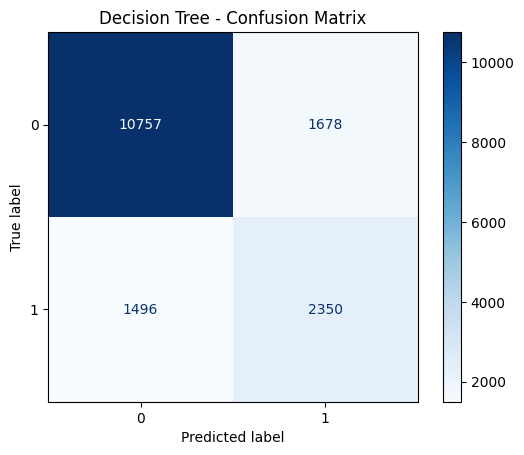

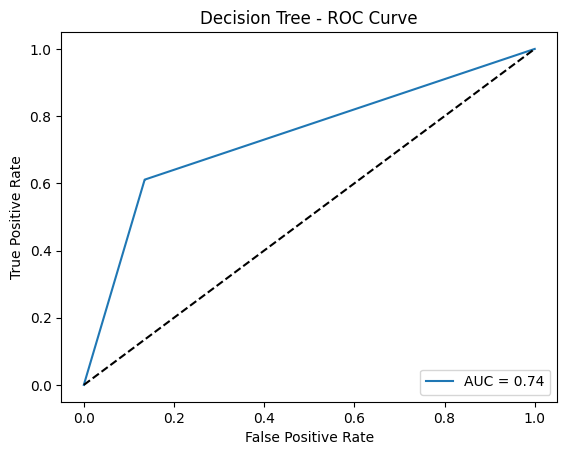

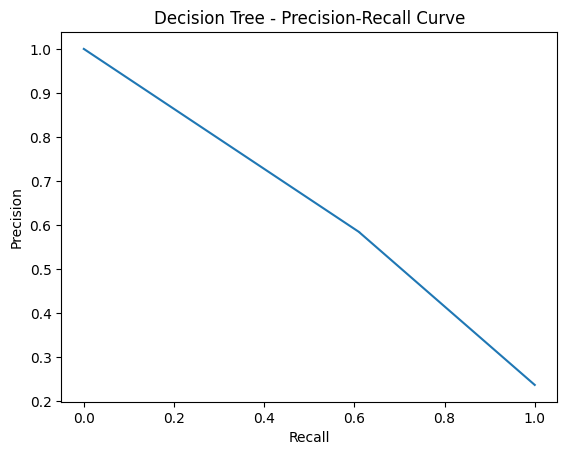

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_dt, y_proba_dt, model_name="Decision Tree")

2. Answer this question:How does a decision tree decide where to split the data?

<b> <font color='red'>Your Answer:</font></b><br>
Decision Trees split data <b>based on feature values and build a tree of decisions.</b> They are easy to interpret but prone to overfitting if not pruned or limited by depth. <b>Hyperparameters like max_depth help control this.</b>

###3)Random Forest (Ensemble of Decision Trees)

Random Forest is an ensemble method that builds many decision trees on different parts of the data and combines their results. Each tree votes on the prediction, and the majority vote is taken as the final output.

 **Your Task**:
1. Implement and train the Random Forest classifier on the training dataset.(and then evaluate it on the test dataset)

--- Random Forest Evaluation ---
Accuracy: 0.8491
Precision: 0.7042
Recall: 0.6227
F1 Score: 0.6610


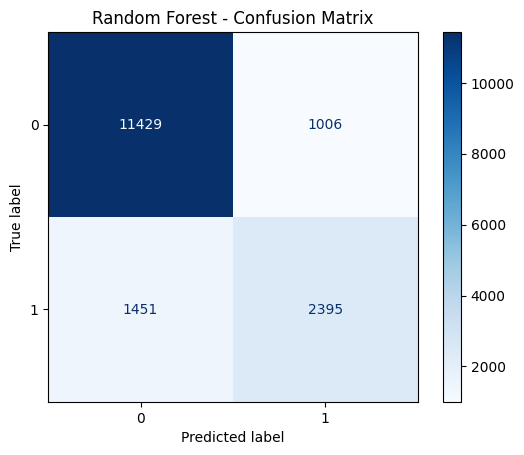

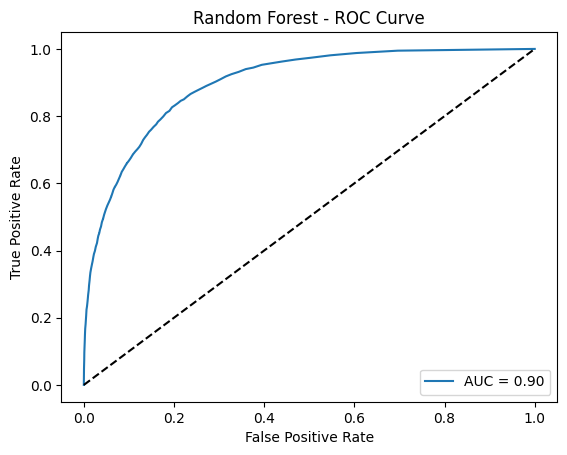

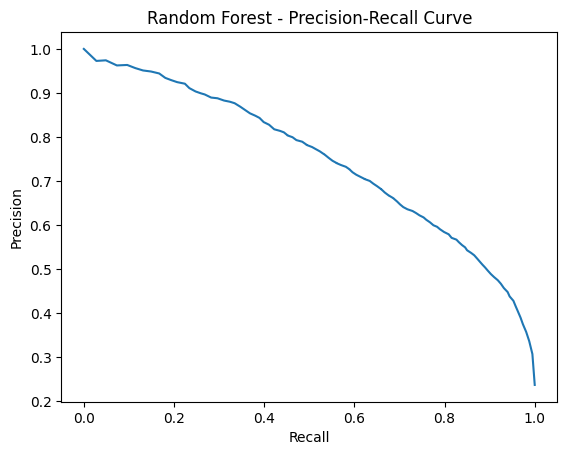

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_rf, y_proba_rf, model_name="Random Forest")

2. Answer this question:Why does Random Forest use more than one decision tree?

<b> <font color='red'>Your Answer:</font></b><br>
Random Forest uses more than one decision tree to <b>improve prediction accuracy and reduce overfitting.</b> By combining the results of many diverse trees (each trained on different subsets of data and features), <b>it averages out their individual biases and variances. This ensemble approach makes the model more robust and generalizable to unseen data.</b>

###4)Gradient Boosting Models (XGBoost, LightGBM, CatBoost)

These models build decision trees one at a time, where each new tree focuses on fixing the errors made by the previous ones. This process is called “boosting.” They add up the results of many trees to improve accuracy step-by-step.

###4-1)XGBoost

XGBoost builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones. It uses a special technique called “gradient boosting” to minimize the overall loss function efficiently.

 **Your Task**:
1. implement and train the XGBoost classifier on the training dataset.(and then evaluate it on the test dataset)

In [ ]:
!pip install xgboost

--- XGBoost Evaluation ---
Accuracy: 0.8697
Precision: 0.7559
Recall: 0.6625
F1 Score: 0.7061


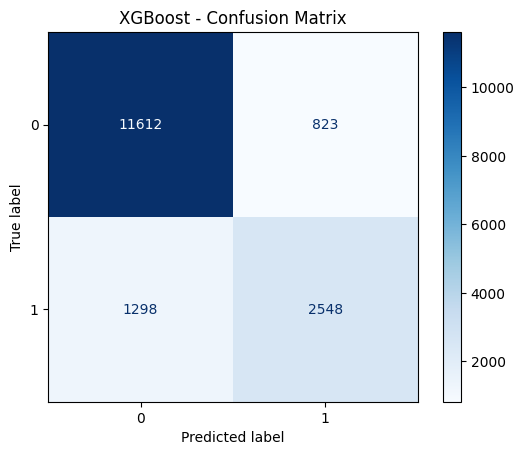

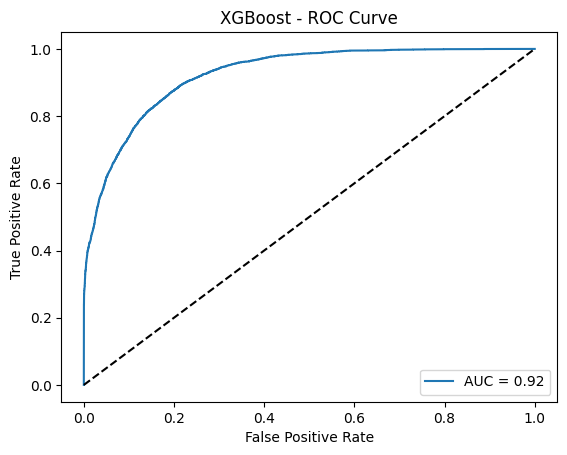

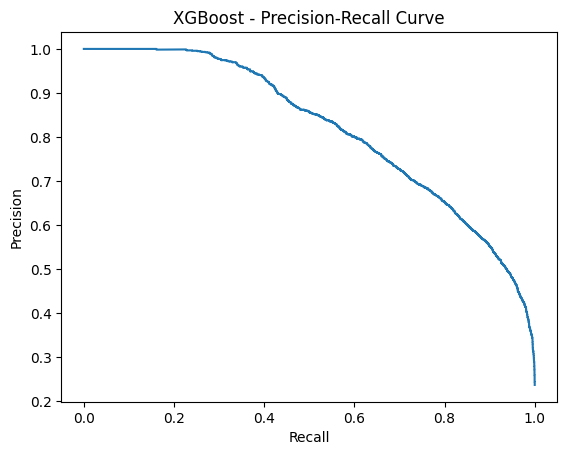

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the classifier
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_xgb, y_proba_xgb, model_name="XGBoost")

2. Answer this question:Why does XGBoost build trees in sequence?

<b> <font color='red'>Your Answer:</font></b><br>
XGBoost builds trees in sequence <b>because each new tree is trained to correct the errors made by the previous trees. This sequential learning process, known as boosting, allows the model to focus more on the difficult-to-predict instances and gradually improve overall accuracy.</b> By combining these weak learners, XGBoost creates a strong predictive model that performs better than individual trees.

###4-2)LightGBM

LightGBM (Light Gradient Boosting Machine) is a fast, efficient gradient LightGBM is a gradient boosting algorithm that grows trees leaf-wise instead of level-wise, meaning it chooses the leaf with the highest error to grow, which leads to faster and potentially more accurate learning.

 **Your Task**:
1. Implement and train the LightGBM classifier on the training dataset.(and then evaluate it on the test dataset)

In [ ]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 24720, number of negative: 24720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9958
[LightGBM] [Info] Number of data points in the train set: 49440, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM Evaluation ---
Accuracy: 0.8692
Precision: 0.7573
Recall: 0.6565
F1 Score: 0.7033


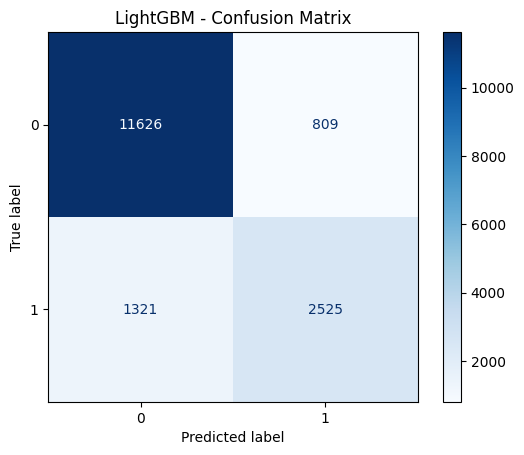

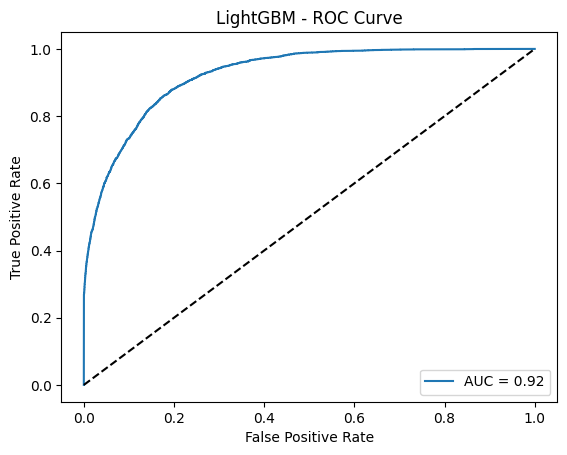

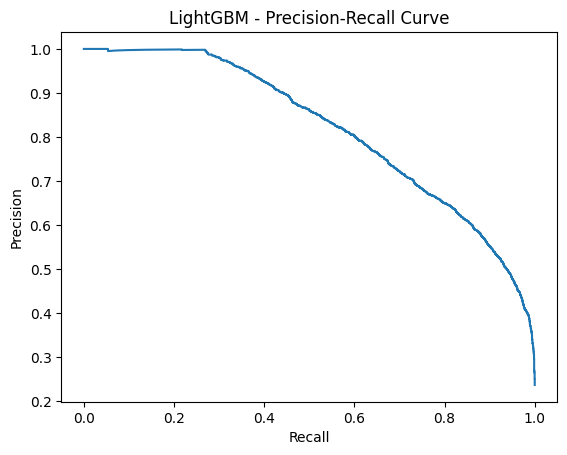

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the classifier
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_lgb, y_proba_lgb, model_name="LightGBM")

2. Answer this question:How does LightGBM grow trees differently?

<b> <font color='red'>Your Answer:</font></b><br>
LightGBM <b>grows trees leaf-wise (best-first), not level-wise like traditional decision tree algorithms. This means it chooses to grow the leaf that results in the largest decrease in loss, which often leads to better accuracy and faster convergence.</b> However, this approach can lead to deeper trees and potential overfitting, so it requires careful tuning.

###5)Logistic Regression

Logistic Regression is a model that calculates the probability of a data point belonging to a class. It uses a linear combination of input features and passes the result through a function that outputs values between 0 and 1 (called the sigmoid function).

 **Your Task**:
1. Implement and train the Logistic Regression classifier on the training dataset.(and then evaluate it on the test dataset)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression Evaluation ---
Accuracy: 0.8144
Precision: 0.5767
Recall: 0.8060
F1 Score: 0.6724


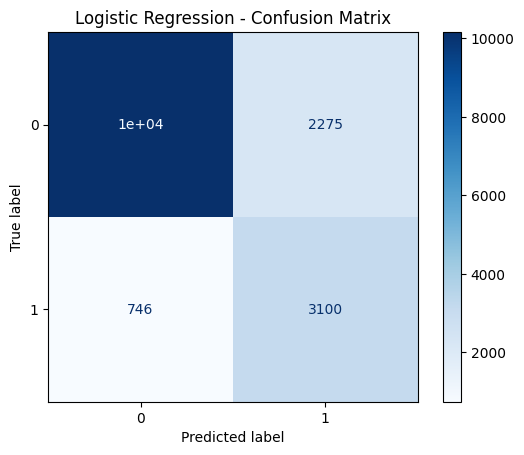

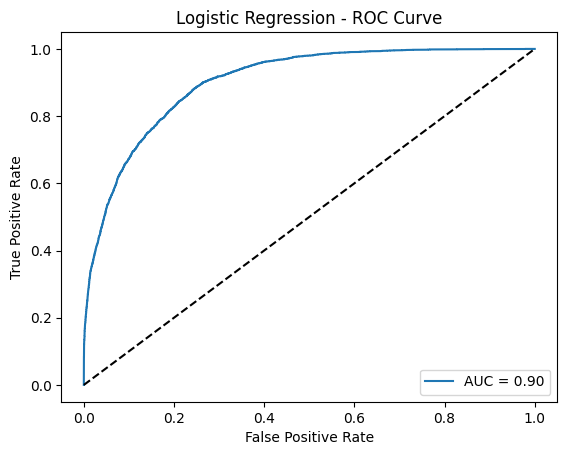

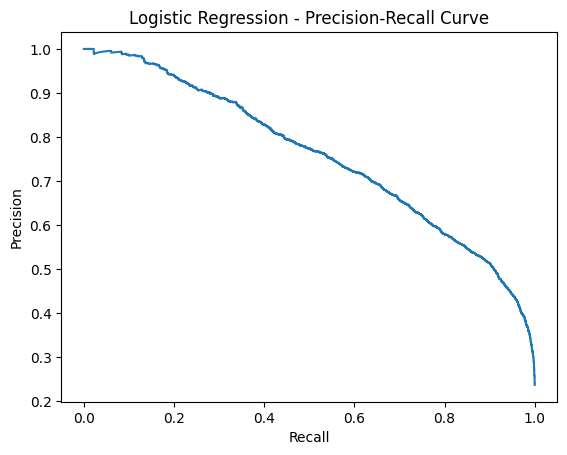

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the classifier
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_logreg, y_proba_logreg, model_name="Logistic Regression")

2. Answer this question:How is the linear formula used in this logistic regression?

<b> <font color='red'>Your Answer:</font></b><br>
In **logistic regression**, the linear formula is used to model the relationship between the input features and the probability of the target class. The formula is a linear combination of the input features, which is then passed through a **sigmoid function** to map the result to **a value between 0 and 1, representing the probability of the positive class.**

Mathematically, the linear formula is:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

where:

* $\mathbf{w}$ is the vector of weights (coefficients for each feature),
* $\mathbf{x}$ is the feature vector,
* $b$ is the bias term.

This linear output $z$ is passed through the **sigmoid function**:

$$
\hat{y} = \frac{1}{1 + e^{-z}}
$$

where $\hat{y}$ is the predicted probability of the positive class.

###6)SVM with different kernels (e.g., linear, RBF)

SVM finds a line (or a plane in higher dimensions) that best separates the classes in the data. It tries to place this line as far as possible from the nearest points of each class. With different kernels (like linear or RBF), it can also handle non-linear data.

 **Your Task**:
1. Implement and train the SVM classifier on the training dataset.(and then evaluate it on the test dataset)

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)

# Train the classifier
svm_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_linear = svm_linear.predict(X_test)
y_proba_svm_linear = svm_linear.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_svm_linear, y_proba_svm_linear, model_name="SVM (Linear)")


# Initialize the SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the classifier
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_rbf = svm_rbf.predict(X_test)
y_proba_svm_rbf = svm_rbf.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_svm_rbf, y_proba_svm_rbf, model_name="SVM (RBF)")

2. Answer this question:How does SVM handle data that can't be separated by a straight line?

<b> <font color='red'>Your Answer:</font></b><br>
<b>Support Vector Machines (SVM) handle non-linearly separable data</b> using a technique called the <b>kernel trick.</b>

When the data cannot be separated by a straight line (in 2D plane) or a hyperplane (in higher dimensions), <b>SVM uses a kernel function to implicitly transform the data into a higher-dimensional space where it becomes linearly separable.</b>

Common kernels include:
- Polynomial Kernel
- Radial Basis Function (RBF) Kernel
- Sigmoid Kernel

By applying a kernel, SVM can find a non-linear decision boundary in the original input space while still computing everything efficiently in the transformed space.

This allows SVM to classify complex patterns without explicitly performing the transformation.

###7)Neural Networks (simple MLP for classification)

A Multi-Layer Perceptron (MLP) is a neural network made of layers of connected nodes (neurons). Each neuron takes inputs, applies weights and an activation function, and passes the result to the next layer. It learns by adjusting the weights to reduce prediction error.

 **Your Task**:
1. Implement and train the Neural Networks classifier (simple MLP for classification) on the training dataset.(and then evaluate it on the test dataset)

--- Neural Network (MLP) Evaluation ---
Accuracy: 0.8234
Precision: 0.6361
Recall: 0.5900
F1 Score: 0.6122


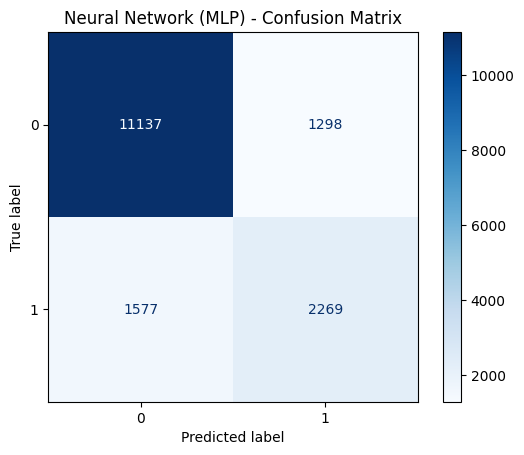

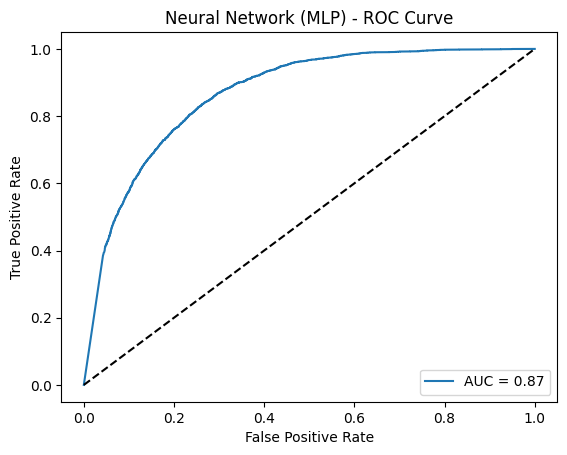

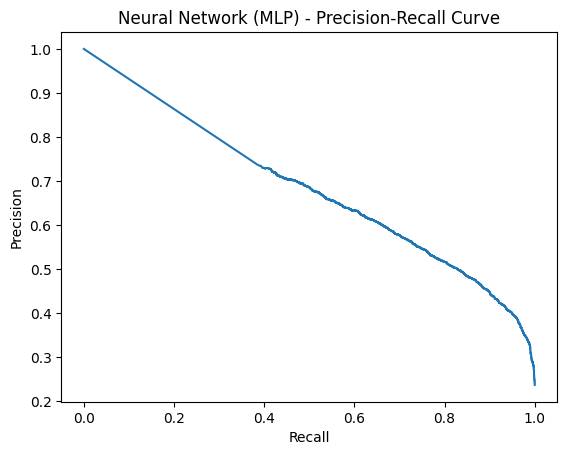

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Evaluate the model
evaluate_model(y_test, y_pred_mlp, y_proba_mlp, model_name="Neural Network (MLP)")

2. Answer this question:What happens during the learning process in a neural network?

<b> <font color='red'>Your Answer:</font></b><br>
In a **neural network**, the **learning process** involves **adjusting the weights and biases of the network to minimize the difference between the predicted outputs and the true targets** (i.e., reducing the **loss**). Here's an overview of what happens:

### 1. **Initialization**:

* Initially, the weights and biases are typically set to small random values.
* This randomness helps the network to break symmetry and allows for effective learning.

### 2. **Forward Pass**:

* **Input**: The input data is passed through the network's layers.
* **Activation Functions**: In each layer, the weighted sum of inputs is passed through an **activation function** (such as ReLU or Sigmoid) to introduce non-linearity.
* **Output**: The final layer produces the output prediction.

### 3. **Loss Calculation**:

* The predicted output is compared to the actual target values (ground truth).
* The **loss function** (like Mean Squared Error or Cross-Entropy) calculates a numerical value representing the error between the predicted and actual outputs.

### 4. **Backpropagation**:

* **Error Propagation**: The error (loss) is propagated back through the network using **backpropagation**.
* **Gradients**: In backpropagation, the gradient of the loss function with respect to each weight and bias is computed using the **chain rule** of calculus.
* This tells the network how much each weight contributed to the error and in which direction it should be adjusted.

### 5. **Weight Update (Gradient Descent)**:

* The weights and biases are adjusted based on the gradients computed in the previous step.
* This is done using an optimization algorithm like **Stochastic Gradient Descent (SGD)** or **Adam**, which updates the weights in the direction that reduces the error.
* **Learning Rate**: A parameter called the **learning rate** controls how much the weights are adjusted in each step.

### 6. **Iteration (Epoch)**:

* The process of forward pass, loss calculation, backpropagation, and weight update is repeated multiple times (across multiple **epochs**).
* Over time, the network learns to make more accurate predictions by continuously adjusting the weights.

### 7. **Convergence**:

* As training progresses, the loss function decreases, and the model's predictions become more accurate.
* The learning process continues until the loss stops improving significantly or reaches a predefined stopping criterion (like a set number of epochs or a threshold for the loss).

### In summary:

**The learning process in a neural network is about adjusting weights through gradient descent to minimize the loss function and make the network's predictions more accurate. It involves forward propagation, loss calculation, backpropagation, and iterative weight updates.**


# Step 10: Hyperparameter Tuning
Once you have selected the models, you will perform **hyperparameter tuning** to optimize their performance. Hyperparameters are settings that are not learned directly from the data and must be set before training. Examples include the number of neighbors in KNN or the depth of trees in decision tree models.

**Overview:**

You are required to implement the following methods for tuning:

- **Grid Search:** Use Grid Search to search for the best combination of hyperparameters by exhaustively trying all possible combinations in the predefined grid.
- **Randomized Search:** This method performs a randomized search over hyperparameters, sampling from specified distributions. It is more efficient than Grid Search when the search space is large.
- **Bayesian Optimization (optional):** Implement Bayesian optimization using libraries like **Optuna** or **Hyperopt**. This method optimizes hyperparameters by considering prior knowledge of the search space and efficiently explores the most promising configurations.


###1)Grid Search

Grid Search is a method used to find the best combination of hyperparameters by trying out every possible combination from a predefined set of values. For each combination, the model is trained and evaluated, and the one that gives the best result on a validation set is chosen. It helps you systematically explore which settings work best for your model.

**Your Task**:

1.Perform Grid Search on the models.

Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score for KNN: 0.7461569579288025
--- Best KNN (Grid Search) Evaluation ---
Accuracy: 0.6466
Precision: 0.3309
Recall: 0.4852
F1 Score: 0.3934


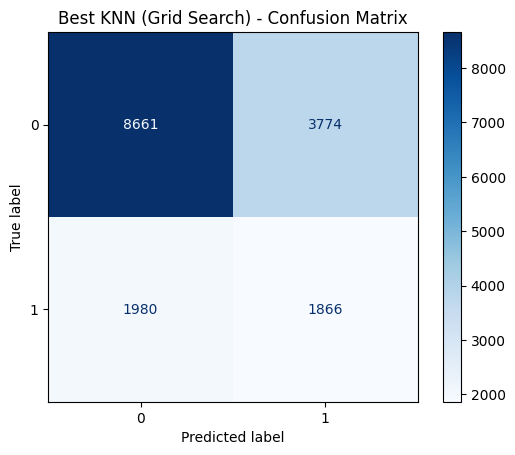

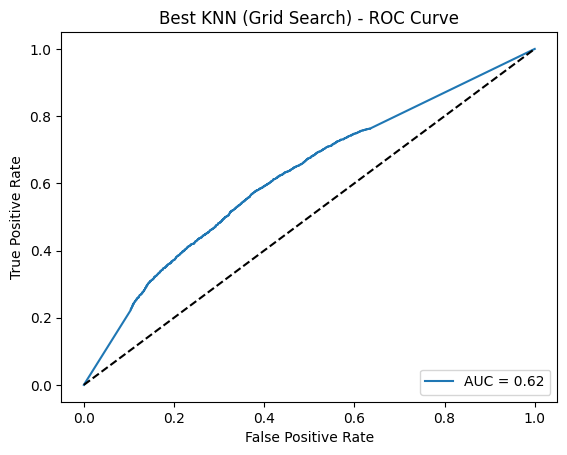

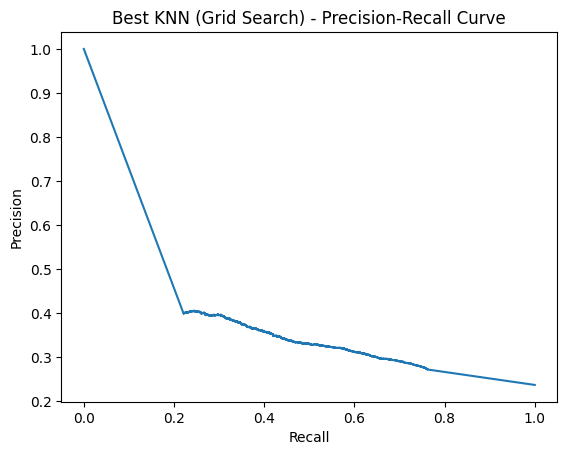

In [ ]:
# Performing Grid Search on KNN

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

# Evaluate the best model on the test data
best_knn_model = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)
y_proba_best_knn = best_knn_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_best_knn, y_proba_best_knn, model_name="Best KNN (Grid Search)")

2. Answer this question:Is Grid Search efficient for large search spaces?

<b> <font color='red'>Your Answer:</font></b><br>

Grid Search is a **brute-force** method for hyperparameter optimization where all possible combinations of hyperparameters are evaluated exhaustively. While it is a simple and effective approach for small search spaces, **it is not efficient for large search spaces**.

- **Exponential Growth of Combinations:**

- **Computationally Expensive:**

- **Inefficient Use of Resources:**

- **No Exploration of More Efficient Regions:**

While **Grid Search** is simple and can work well for small search spaces, it is **not efficient for large search spaces** due to its exhaustive nature and the exponential growth of combinations.

###2)Randomized Search

Randomized Search selects random combinations of hyperparameters from specified distributions instead of testing every single one. You choose how many random combinations to try, and the best one is picked based on performance. It's useful when you want to sample from a wide space without checking everything.

**Your Task**:

1.Perform Randomized Search on the models.

In [ ]:
# Perform Randomized Search on Random Forest

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(randint(10, 100).rvs(10)), # Mix of None and random integers
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9),  # Percentage of features to consider
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search_rf.fit(X_train, y_train)


# Print the best hyperparameters and the best score
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)
print("Best score for Random Forest:", random_search_rf.best_score_)

# Evaluate the best model on the test data
best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
y_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_best_rf, y_proba_best_rf, model_name="Best Random Forest (Randomized Search)")

2. Answer this question:What’s the main difference from Grid Search?

<b> <font color='red'>Your Answer:</font></b><br>

| Feature                | **Grid Search**                               | **Randomized Search**                                |
| ---------------------- | --------------------------------------------- | ---------------------------------------------------- |
| **Search Type**        | Exhaustive search over all combinations       | Random sampling from the search space                |
| **Efficiency**         | Can be inefficient for large search spaces    | More efficient for large search spaces               |
| **Computational Cost** | High computational cost, grows exponentially  | Lower computational cost due to fewer evaluations    |
| **Time Consumption**   | Takes more time for larger parameter spaces   | Takes less time, can find good results faster        |
| **Exploration**        | Systematic exploration of the entire space    | Broader exploration with fewer evaluations           |
| **Result Quality**     | Guarantees full exploration, may find optimal | May find near-optimal results with fewer evaluations |
| **Best Use Case**      | Small to medium search spaces                 | Large search spaces, time-constrained tasks          |

<br>
<b>Randomized Search</b> is generally more efficient and practical than <b>Grid Search</b> for large or complex search spaces. It explores the space more broadly and doesn't require evaluating every possible combination, making it faster while still often yielding competitive results. <b>Grid Search</b> may still be useful for smaller, well-defined search spaces where exhaustive search is feasible and guarantees finding the optimal solution.

###3)Bayesian Optimization (optional, e.g., with libraries like Optuna or Hyperopt)

Bayesian Optimization is a smarter way of tuning hyperparameters. It builds a model of the performance (objective function) based on past results and decides which hyperparameters to try next by predicting which ones might work better. Libraries like Optuna or Hyperopt help automate this process.

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-2)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])

    # Initialize the MLPClassifier with suggested hyperparameters
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=500,
        random_state=42
    )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and the best score
print("Best hyperparameters for Neural Network (MLP):", study.best_params)
print("Best score for Neural Network (MLP):", study.best_value)

# Train the best model on the full training set
best_params = study.best_params
best_mlp = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate'],
    max_iter=500,
    random_state=42
)
best_mlp.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_best_mlp = best_mlp.predict(X_test)
y_proba_best_mlp = best_mlp.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_best_mlp, y_proba_best_mlp, model_name="Best Neural Network (Bayesian Optimization)")

[I 2025-05-22 13:29:27,108] A new study created in memory with name: no-name-b0999e21-b3ba-4b05-a86c-6b06a4707e70
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices 

2. Answer this question:What makes Bayesian Optimization smart?

<b> <font color='red'>Your Answer:</font></b><br>
<b>Bayesian Optimization is smart</b> because it uses a probabilistic model to guide the search for optimal solutions by <b>learning from past evaluations.</b> It balances exploration (trying new areas) and exploitation (focusing on promising areas), reduces uncertainty, and minimizes costly evaluations, making it efficient in finding optimal solutions with fewer trials.

# Step 11: Evaluation  
This part of the project focuses on assessing the performance of the trained models. It involves comparing the model's predictions with the actual outcomes from the test dataset. This step helps determine how well each model generalizes to unseen data.

**Your Task**:

1. Answer this question: What are the formulas for Accuracy, Precision, Recall, F1-score?

<b> <font color='red'>Your Answer:</font></b><br>

- **Accuracy** = (TP + TN) / (TP + TN + FP + FN)  
  Measures the overall correctness of the model.  

- **Precision** = TP / (TP + FP)  
  Measures how many of the predicted positives are actually positive.  

- **Recall** = TP / (TP + FN)  
  Measures how many of the actual positives were correctly predicted.  

- **F1 Score** = 2 × (Precision × Recall) / (Precision + Recall)  
  Harmonic mean of precision and recall; useful when classes are imbalanced.

Where:  
- TP = True Positives  
- TN = True Negatives  
- FP = False Positives  
- FN = False Negatives


2. Answer this question: What are the ROC Curve & AUC curve?

<b> <font color='red'>Your Answer:</font></b><br>

- **ROC Curve (Receiver Operating Characteristic Curve):**  
  A graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. It plots the **True Positive Rate (Recall)** on the Y-axis against the **False Positive Rate (1 - Specificity)** on the X-axis.

- **AUC (Area Under the Curve):**  
  A single scalar value that summarizes the performance of a classifier across all thresholds. AUC ranges from 0 to 1:
  - AUC = 1.0 means perfect classification.
  - AUC = 0.5 means the classifier is no better than random guessing.
  - The higher the AUC, the better the model is at distinguishing between positive and negative classes.

ROC and AUC are especially useful when the classes are imbalanced or when the cost of false positives and false negatives are different.

3. Answer this question: What is a Confusion Matrix?

<b> <font color='red'>Your Answer:</font></b><br>

A **Confusion Matrix** is a table used to evaluate the performance of a classification model by comparing the actual and predicted labels. It breaks down the predictions into four categories:

- **True Positives (TP):** Correctly predicted positive instances.
- **True Negatives (TN):** Correctly predicted negative instances.
- **False Positives (FP):** Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN):** Incorrectly predicted negative instances (Type II error).

The confusion matrix helps you understand not only the errors made by the model but also the types of errors. It is the basis for many evaluation metrics such as Accuracy, Precision, Recall, and F1-score.

# Step 12: Cross-Validation (Optional)
To ensure the models generalize well to unseen data, you will use **cross-validation**. This technique splits the dataset into multiple subsets (folds), and each model is trained on different combinations of training and validation sets. This will give you a more robust estimate of the model's performance.

**"Note: You should implement cross-validation for only one model."**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on Logistic Regression
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Step 13: Model Comparison
After evaluating all the models, you will compare them based on their performance metrics. The goal is to select the best model that performs well across multiple metrics and generalizes effectively to unseen data.

(Optional) you should apply **statistical tests** (such as **McNemar’s test**) to assess whether differences between model performances are statistically significant. This will help ensure the selection of the optimal model is based on solid evidence.

## Step 14: Conclusion
At the end of this step, you will identify the best-performing model based on the evaluation metrics. You should then decide if further improvements (e.g., feature engineering, model ensembling) are necessary to achieve better results.

Among all models tested, **XGBoost achieved the highest performance with an F1-score of 0.7061, indicating a strong balance between precision and recall** in predicting whether an individual's income exceeds $50K.

This result suggests that **XGBoost is currently the most effective model for this classification task**. Its ability to handle complex patterns, robustness to overfitting contributed to its superior performance.

Further **improvements** may still be possible. Recommended next steps include:

**Feature Engineering**: Creating additional or more informative features using domain knowledge may enhance model learning.

**Model Ensembling**: Combining XGBoost with other models (e.g., logistic regression, neural networks) through stacking or voting may yield performance gains by capturing diverse patterns.